# Análisis Exploratorio de Datos - Predicción de Precios de Alquiler en AMBA

## Integrantes del Equipo
- Ignacio Bruzone
- Felix Lopez Menardi
- Christian Ijjas

## Fecha de Entrega
06/10/2025

---

## Tabla de Contenidos
1. [Descripción del Dataset](#1-descripción-del-dataset)
2. [Análisis Exploratorio Básico](#2-análisis-exploratorio-básico)
3. [Diagnóstico y Mejoras en la Calidad de los Datos](#3-diagnóstico-y-mejoras-en-la-calidad-de-los-datos)
4. [Transformaciones Realizadas](#4-transformaciones-realizadas)
5. [Reflexión Final](#5-reflexión-final)

---


## 1. Descripción del Dataset

### 1.1 Origen y Formato

El dataset `alquiler_AMBA_dev.csv` contiene información sobre precios de alquiler de propiedades en el Área Metropolitana de Buenos Aires (AMBA), extraída de Mercado Libre Argentina durante los años 2021 y 2022.

**Características del formato:**
- **Formato**: CSV (Comma Separated Values)
- **Tamaño**: 278,726 registros
- **Período**: 2021-2022
- **Fuente**: Mercado Libre Argentina
- **Geolocalización**: Polígonos de 200m x 200m para anonimización

### 1.2 Variables Incluidas y su Significado

El dataset incluye las siguientes categorías de variables:

#### Variables de Identificación y Ubicación
- **id_grid**: ID único del polígono geográfico
- **LONGITUDE/LATITUDE**: Coordenadas del centroide del polígono
- **ITE_ADD_CITY_NAME**: Ciudad donde se encuentra la propiedad
- **ITE_ADD_STATE_NAME**: Provincia de ubicación
- **ITE_ADD_NEIGHBORHOOD_NAME**: Barrio de ubicación

#### Variables Temporales
- **MesListing**: Mes de publicación del anuncio
- **year**: Año de publicación

#### Variables Físicas de la Propiedad
- **TIPOPROPIEDAD**: Tipo de propiedad (Departamento, Casa, etc.)
- **STotalM2**: Superficie total en metros cuadrados
- **SConstrM2**: Superficie construida en metros cuadrados
- **Dormitorios**: Cantidad de dormitorios
- **Banos**: Cantidad de baños
- **Ambientes**: Cantidad total de ambientes
- **Antiguedad**: Antigüedad de la propiedad en años

#### Variables de Características y Amenities
Variables binarias (Sí/No) para amenities como:
- **Amoblado**: Propiedad amoblada
- **Cisterna, AccesoInternet, BusinessCenter, Gimnasio, Laundry**
- **Calefaccion, AireAC, Estacionamiento, Ascensor, Seguridad**
- **Pileta, Cocheras, SalonFiestas, Jacuzzi, Chimenea**
- Y muchas más amenities detalladas...

#### Variable Target
- **precio_pesos_constantes**: Precio de alquiler ajustado por inflación (variable objetivo)

### 1.3 Justificación de la Elección del Dataset

**Ventajas del dataset:**
1. **Representatividad**: Cobertura completa del AMBA con datos de Mercado Libre (plataforma líder)
2. **Tamaño**: 278,726 registros proporcionan una base sólida para modelado
3. **Variables Ricas**: Incluye características físicas, amenities, y ubicación geográfica
4. **Ajuste por Inflación**: Precios en pesos constantes eliminan el sesgo temporal
5. **Geolocalización Anonimizada**: Balance entre precisión espacial y privacidad
6. **Período Reciente**: Datos de 2021-2022 son representativos del mercado actual

**Limitaciones identificadas:**
1. **Solo Mercado Libre**: Puede no representar el mercado completo
2. **Anonimización Geográfica**: Polígonos de 200m pueden perder precisión espacial
3. **Dependencia de Publicaciones Online**: Sesgo hacia propiedades con mejor marketing digital


In [6]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Librerías importadas exitosamente")
print(f"Fecha de ejecución: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


Librerías importadas exitosamente
Fecha de ejecución: 2025-09-21 15:42:38


In [7]:
# Cargar el dataset
df = pd.read_csv('data/alquiler_AMBA_dev.csv')

print(f"Dataset cargado exitosamente")
print(f"Dimensiones del dataset: {df.shape}")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Mostrar las primeras filas
print("\nPrimeras 5 filas del dataset:")
df.head()


Dataset cargado exitosamente
Dimensiones del dataset: (278725, 45)
Memoria utilizada: 431.11 MB

Primeras 5 filas del dataset:


,id_grid,MesListing,TIPOPROPIEDAD,STotalM2,SConstrM2,Dormitorios,Banos,Ambientes,SitioOrigen,Amoblado,Antiguedad,Cisterna,AccesoInternet,BusinessCenter,Gimnasio,Laundry,Calefaccion,SalonDeUsosMul,AireAC,Recepcion,Estacionamiento,Jacuzzi,AreaJuegosInfantiles,Chimenea,Ascensor,SalonFiestas,Seguridad,Pileta,Cocheras,PistaJogging,EstacionamientoVisitas,Lobby,LocalesComerciales,SistContraIncendios,AreaParrillas,CanchaTennis,AreaCine,ITE_ADD_CITY_NAME,ITE_ADD_STATE_NAME,ITE_ADD_NEIGHBORHOOD_NAME,ITE_TIPO_PROD,LONGITUDE,LATITUDE,precio_pesos_constantes,year
0,59362,2022-08-01,Departamento,39.0,36.0,1,1,2,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,Caseros,Bs.As. G.B.A. Oeste,Caseros,N,-58.566145,-34.599299,6.279294e+03,2022
1,68287,2021-04-01,Departamento,47.0,40.0,1,1,2,0,No,7 años,0,No,0,No,No,No,No,Sí,0,0,No,0,0,0,0,No,No,0,0.0,0,0.0,0.0,0,0.0,0,0,Capital Federal,Capital Federal,Núñez,U,-58.473708,-34.551759,1.092339e+04,2021
2,59774,2021-09-01,Departamento,128.0,63.0,1,1,3,0,No,40 años,0,No,0,No,No,No,No,Sí,0,0,No,0,0,0,0,Sí,No,0,0.0,0,0.0,0.0,0,0.0,0,0,Capital Federal,Capital Federal,NaN,U,-58.385136,-34.599685,1.081992e+04,2021
3,62402,2022-11-01,Departamento,436.0,436.0,2,3,8,NaN,NaN,50.0,NaN,0.0,NaN,0.0,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,Capital Federal,Capital Federal,Recoleta,U,-58.393617,-34.585162,1.230069e+05,2022
4,57804,2021-04-01,Departamento,300.0,300.0,2,4,6,0,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0.0,No,0.0,0.0,0,0.0,No,0,Capital Federal,Capital Federal,Monserrat,U,-58.376592,-34.610603,7.714647e+06,2021


## 2. Análisis Exploratorio Básico

### 2.1 Tipos de Variables


In [8]:
# Análisis de tipos de datos
print("=== ANÁLISIS DE TIPOS DE DATOS ===")
print(f"Total de columnas: {len(df.columns)}")
print(f"Total de registros: {len(df)}")

# Información general del dataset
print("\nInformación detallada de tipos de datos:")
print(df.info())

# Clasificación de variables por tipo
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f"\n=== CLASIFICACIÓN DE VARIABLES ===")
print(f"Variables numéricas ({len(numeric_cols)}): {numeric_cols}")
print(f"Variables categóricas ({len(categorical_cols)}): {categorical_cols}")
print(f"Variables de fecha ({len(datetime_cols)}): {datetime_cols}")

# Crear un DataFrame con información de tipos
types_info = pd.DataFrame({
    'Columna': df.columns,
    'Tipo': df.dtypes,
    'Valores_Únicos': df.nunique(),
    'Valores_Nulos': df.isnull().sum(),
    'Porcentaje_Nulos': (df.isnull().sum() / len(df)) * 100
})

print("\n=== RESUMEN DE TIPOS Y VALORES NULOS ===")
types_info


=== ANÁLISIS DE TIPOS DE DATOS ===
Total de columnas: 45
Total de registros: 278725

Información detallada de tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278725 entries, 0 to 278724
Data columns (total 45 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_grid                    278725 non-null  int64  
 1   MesListing                 278725 non-null  object 
 2   TIPOPROPIEDAD              278725 non-null  object 
 3   STotalM2                   278705 non-null  float64
 4   SConstrM2                  278705 non-null  float64
 5   Dormitorios                278725 non-null  int64  
 6   Banos                      278725 non-null  int64  
 7   Ambientes                  278725 non-null  int64  
 8   SitioOrigen                188004 non-null  object 
 9   Amoblado                   246475 non-null  object 
 10  Antiguedad                 252752 non-null  object 
 11  Cisterna         

,Columna,Tipo,Valores_Únicos,Valores_Nulos,Porcentaje_Nulos
id_grid,id_grid,int64,13273,0,0.000000
MesListing,MesListing,object,24,0,0.000000
TIPOPROPIEDAD,TIPOPROPIEDAD,object,1,0,0.000000
STotalM2,STotalM2,float64,578,20,0.007176
SConstrM2,SConstrM2,float64,498,20,0.007176
Dormitorios,Dormitorios,int64,21,0,0.000000
Banos,Banos,int64,20,0,0.000000
Ambientes,Ambientes,int64,28,0,0.000000
SitioOrigen,SitioOrigen,object,5,90721,32.548569
Amoblado,Amoblado,object,7,32250,11.570544


### 2.2 Distribuciones y Estadísticas Descriptivas


In [9]:
# Estadísticas descriptivas para variables numéricas
print("=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS ===")
numeric_stats = df[numeric_cols].describe()
print(numeric_stats)

# Estadísticas adicionales
print("\n=== ESTADÍSTICAS ADICIONALES ===")
additional_stats = pd.DataFrame({
    'Media': df[numeric_cols].mean(),
    'Mediana': df[numeric_cols].median(),
    'Moda': df[numeric_cols].mode().iloc[0] if len(df[numeric_cols].mode()) > 0 else 'N/A',
    'Desv_Est': df[numeric_cols].std(),
    'Coef_Var': df[numeric_cols].std() / df[numeric_cols].mean(),
    'Asimetría': df[numeric_cols].skew(),
    'Curtosis': df[numeric_cols].kurtosis()
})

additional_stats


=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS ===
             id_grid      STotalM2     SConstrM2    Dormitorios  \
count  278725.000000  2.787050e+05  2.787050e+05  278725.000000   
mean    59833.062739  3.739940e+03  3.356831e+04       1.422237   
std     14774.014764  9.492445e+05  8.415217e+06       1.199622   
min       124.000000  0.000000e+00  0.000000e+00       0.000000   
25%     53518.000000  3.800000e+01  3.600000e+01       1.000000   
50%     60083.000000  5.000000e+01  4.600000e+01       1.000000   
75%     65662.000000  7.600000e+01  7.000000e+01       2.000000   
max     97826.000000  3.321555e+08  2.287862e+09      99.000000   

               Banos      Ambientes       Cocheras  PistaJogging     Lobby  \
count  278725.000000  278725.000000  278725.000000      188004.0  188004.0   
mean        1.335632       2.389473       0.402454           0.0       0.0   
std         1.023134       1.392421       2.088215           0.0       0.0   
min        -1.000000       0

,Media,Mediana,Moda,Desv_Est,Coef_Var,Asimetría,Curtosis
id_grid,59833.062739,60083.000000,57811.000000,1.477401e+04,0.246921,-0.096716,1.553364
STotalM2,3739.939588,50.000000,40.000000,9.492445e+05,253.812789,320.048512,108902.522936
SConstrM2,33568.309869,46.000000,40.000000,8.415217e+06,250.689317,263.479664,69633.015141
Dormitorios,1.422237,1.000000,1.000000,1.199622e+00,0.843476,22.357779,1643.693794
Banos,1.335632,1.000000,1.000000,1.023134e+00,0.766030,74.505078,14015.956436
Ambientes,2.389473,2.000000,2.000000,1.392421e+00,0.582731,32.174862,4091.000658
Cocheras,0.402454,0.000000,0.000000,2.088215e+00,5.188703,94.986039,10562.388040
PistaJogging,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000
Lobby,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000
LocalesComerciales,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000


In [10]:
# Análisis de variables categóricas
print("=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===")

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Valores únicos: {df[col].nunique()}")
    print(f"Valores nulos: {df[col].isnull().sum()}")
    print("Top 10 valores más frecuentes:")
    print(df[col].value_counts().head(10))
    print("-" * 50)


=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===

--- MesListing ---
Valores únicos: 24
Valores nulos: 0
Top 10 valores más frecuentes:
MesListing
2021-08-01    13283
2021-07-01    12708
2021-09-01    12619
2021-06-01    12570
2021-11-01    12367
2021-10-01    12313
2021-01-01    12147
2022-11-01    11817
2021-05-01    11539
2022-10-01    11427
Name: count, dtype: int64
--------------------------------------------------

--- TIPOPROPIEDAD ---
Valores únicos: 1
Valores nulos: 0
Top 10 valores más frecuentes:
TIPOPROPIEDAD
Departamento    278725
Name: count, dtype: int64
--------------------------------------------------

--- SitioOrigen ---
Valores únicos: 5
Valores nulos: 90721
Top 10 valores más frecuentes:
SitioOrigen
0.0                         121640
0                            46816
0.0                          19539
churbapropiedades.com.ar         7
administracional.com.ar          2
Name: count, dtype: int64
--------------------------------------------------

--- Amoblado ---
Valores

### 2.3 Análisis de Valores Faltantes


=== ANÁLISIS DE VALORES FALTANTES ===
📊 RESUMEN GENERAL DE VALORES FALTANTES:
   • Total de valores faltantes: 1,705,559
   • Total de celdas en el dataset: 12,542,625
   • Porcentaje general de valores faltantes: 13.60%
   • Columnas con valores faltantes: 31/45

📋 COLUMNAS CON VALORES FALTANTES:
                  Columna  Valores_Faltantes  Porcentaje Tipo_Variable
     AreaJuegosInfantiles              90721   32.548569        object
              SitioOrigen              90721   32.548569        object
      SistContraIncendios              90721   32.548569        object
       LocalesComerciales              90721   32.548569       float64
                    Lobby              90721   32.548569       float64
             PistaJogging              90721   32.548569       float64
                 Ascensor              90721   32.548569        object
                 Cisterna              90721   32.548569        object
                 AreaCine              90721   32.548569      

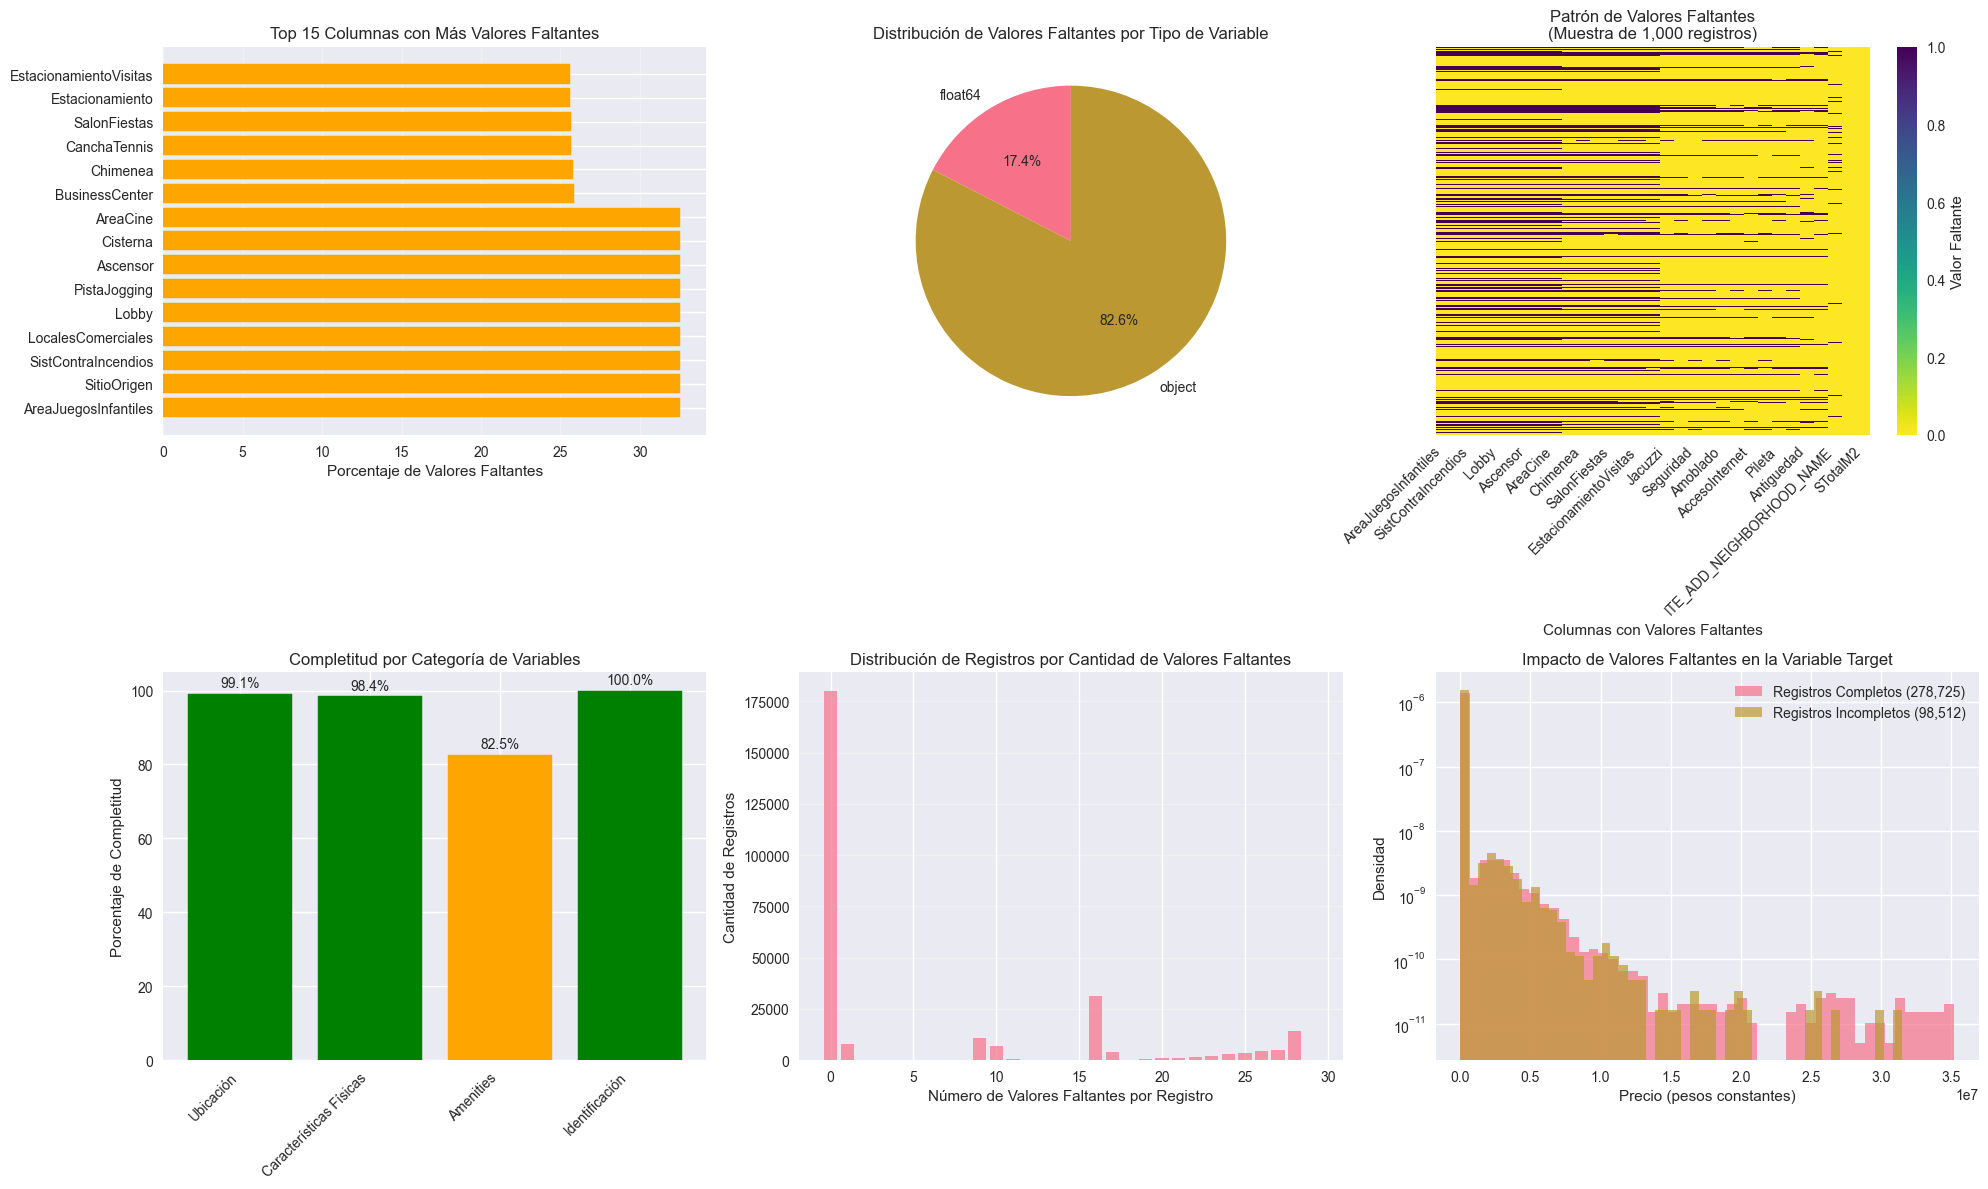


🔍 ANÁLISIS DE PATRONES DE VALORES FALTANTES:
   🚨 Columnas críticas con valores faltantes: ['STotalM2']

�� SUGERENCIAS DE TRATAMIENTO:
   • Evaluar técnicas de imputación para columnas con 20-50% valores faltantes
   • Columnas con <5% valores faltantes pueden tratarse con imputación simple


In [21]:
# Análisis detallado de valores faltantes
print("=== ANÁLISIS DE VALORES FALTANTES ===")

# Calcular valores faltantes
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Crear DataFrame con información de valores faltantes
missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores_Faltantes': missing_data.values,
    'Porcentaje': missing_percentage.values,
    'Tipo_Variable': [df[col].dtype for col in missing_data.index]
}).sort_values('Porcentaje', ascending=False)

# Mostrar resumen general
total_missing = missing_data.sum()
total_cells = len(df) * len(df.columns)
overall_missing_pct = (total_missing / total_cells) * 100

print(f"📊 RESUMEN GENERAL DE VALORES FALTANTES:")
print(f"   • Total de valores faltantes: {total_missing:,}")
print(f"   • Total de celdas en el dataset: {total_cells:,}")
print(f"   • Porcentaje general de valores faltantes: {overall_missing_pct:.2f}%")
print(f"   • Columnas con valores faltantes: {(missing_data > 0).sum()}/{len(df.columns)}")

print(f"\n📋 COLUMNAS CON VALORES FALTANTES:")
columns_with_missing = missing_df[missing_df['Valores_Faltantes'] > 0]
if len(columns_with_missing) > 0:
    print(columns_with_missing.to_string(index=False))
else:
    print("   ✅ ¡Excelente! No hay valores faltantes en el dataset.")

# Visualizaciones mejoradas
fig = plt.figure(figsize=(20, 12))

# 1. Gráfico de barras horizontal - Top 15 columnas con más valores faltantes
if len(columns_with_missing) > 0:
    plt.subplot(2, 3, 1)
    top_missing = columns_with_missing.head(15)
    bars = plt.barh(range(len(top_missing)), top_missing['Porcentaje'])
    plt.yticks(range(len(top_missing)), top_missing['Columna'])
    plt.xlabel('Porcentaje de Valores Faltantes')
    plt.title('Top 15 Columnas con Más Valores Faltantes')
    
    # Colorear barras según el porcentaje
    for i, bar in enumerate(bars):
        if top_missing.iloc[i]['Porcentaje'] > 50:
            bar.set_color('red')
        elif top_missing.iloc[i]['Porcentaje'] > 20:
            bar.set_color('orange')
        else:
            bar.set_color('lightblue')
    
    plt.grid(axis='x', alpha=0.3)

# 2. Distribución de valores faltantes por tipo de variable
plt.subplot(2, 3, 2)
missing_by_type = columns_with_missing.groupby('Tipo_Variable').agg({
    'Valores_Faltantes': 'sum',
    'Porcentaje': 'mean'
}).reset_index()

if len(missing_by_type) > 0:
    plt.pie(missing_by_type['Valores_Faltantes'], labels=missing_by_type['Tipo_Variable'], 
            autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Valores Faltantes por Tipo de Variable')
else:
    plt.text(0.5, 0.5, 'Sin valores faltantes', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Distribución de Valores Faltantes por Tipo de Variable')

# 3. Heatmap de valores faltantes - Muestra completa del dataset
plt.subplot(2, 3, 3)
if len(columns_with_missing) > 0:
    # Muestrear filas para mejor visualización
    sample_size = min(1000, len(df))
    df_sample = df.sample(n=sample_size, random_state=42)
    
    # Crear heatmap solo para columnas con valores faltantes
    missing_cols = columns_with_missing['Columna'].tolist()
    missing_matrix = df_sample[missing_cols].isnull()
    
    sns.heatmap(missing_matrix, cbar=True, yticklabels=False, cmap='viridis_r',
                cbar_kws={'label': 'Valor Faltante'})
    plt.title(f'Patrón de Valores Faltantes\n(Muestra de {sample_size:,} registros)')
    plt.xlabel('Columnas con Valores Faltantes')
    plt.xticks(rotation=45, ha='right')
else:
    plt.text(0.5, 0.5, 'Sin valores faltantes', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Patrón de Valores Faltantes')

# 4. Comparación de completitud por categorías de variables
plt.subplot(2, 3, 4)
completeness_by_category = {
    'Ubicación': ['LONGITUDE', 'LATITUDE', 'ITE_ADD_CITY_NAME', 'ITE_ADD_STATE_NAME', 'ITE_ADD_NEIGHBORHOOD_NAME'],
    'Características Físicas': ['STotalM2', 'SConstrM2', 'Dormitorios', 'Banos', 'Ambientes', 'Antiguedad'],
    'Amenities': ['Cisterna', 'AccesoInternet', 'BusinessCenter', 'Gimnasio', 'Laundry', 'Calefaccion', 'AireAC', 'Estacionamiento'],
    'Identificación': ['id_grid', 'TIPOPROPIEDAD', 'precio_pesos_constantes', 'year']
}

completeness_scores = {}
for category, cols in completeness_by_category.items():
    existing_cols = [col for col in cols if col in df.columns]
    if existing_cols:
        category_missing = df[existing_cols].isnull().sum().sum()
        category_total = len(df) * len(existing_cols)
        completeness_scores[category] = ((category_total - category_missing) / category_total) * 100

if completeness_scores:
    categories = list(completeness_scores.keys())
    scores = list(completeness_scores.values())
    bars = plt.bar(categories, scores)
    plt.title('Completitud por Categoría de Variables')
    plt.ylabel('Porcentaje de Completitud')
    plt.xticks(rotation=45, ha='right')
    
    # Colorear barras según completitud
    for bar, score in zip(bars, scores):
        if score > 90:
            bar.set_color('green')
        elif score > 70:
            bar.set_color('orange')
        else:
            bar.set_color('red')
    
    # Añadir valores en las barras
    for i, score in enumerate(scores):
        plt.text(i, score + 1, f'{score:.1f}%', ha='center', va='bottom')

# 5. Análisis de patrones de valores faltantes
plt.subplot(2, 3, 5)
if len(columns_with_missing) > 0:
    # Contar registros con diferentes cantidades de valores faltantes
    missing_counts = df.isnull().sum(axis=1)
    missing_patterns = missing_counts.value_counts().sort_index()
    
    plt.bar(missing_patterns.index, missing_patterns.values, alpha=0.7)
    plt.xlabel('Número de Valores Faltantes por Registro')
    plt.ylabel('Cantidad de Registros')
    plt.title('Distribución de Registros por Cantidad de Valores Faltantes')
    plt.grid(axis='y', alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Sin valores faltantes', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Distribución de Registros por Cantidad de Valores Faltantes')

# 6. Impacto en la variable target
plt.subplot(2, 3, 6)
if len(columns_with_missing) > 0:
    # Comparar distribución de precios entre registros completos e incompletos
    complete_records = df.dropna(subset=['precio_pesos_constantes'])
    incomplete_records = df[df.isnull().any(axis=1) & df['precio_pesos_constantes'].notnull()]
    
    if len(incomplete_records) > 0:
        plt.hist(complete_records['precio_pesos_constantes'], bins=50, alpha=0.7, 
                label=f'Registros Completos ({len(complete_records):,})', density=True)
        plt.hist(incomplete_records['precio_pesos_constantes'], bins=50, alpha=0.7, 
                label=f'Registros Incompletos ({len(incomplete_records):,})', density=True)
        plt.xlabel('Precio (pesos constantes)')
        plt.ylabel('Densidad')
        plt.title('Impacto de Valores Faltantes en la Variable Target')
        plt.legend()
        plt.yscale('log')
    else:
        plt.text(0.5, 0.5, 'Sin impacto en variable target', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Impacto de Valores Faltantes en la Variable Target')
else:
    plt.text(0.5, 0.5, 'Sin valores faltantes', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Impacto de Valores Faltantes en la Variable Target')

plt.tight_layout()
plt.show()

# Análisis adicional de patrones de valores faltantes
if len(columns_with_missing) > 0:
    print(f"\n🔍 ANÁLISIS DE PATRONES DE VALORES FALTANTES:")
    
    # Identificar columnas con más del 50% de valores faltantes
    high_missing = columns_with_missing[columns_with_missing['Porcentaje'] > 50]
    if len(high_missing) > 0:
        print(f"   ⚠️  Columnas con >50% valores faltantes: {len(high_missing)}")
        for col in high_missing['Columna']:
            print(f"      • {col}: {high_missing[high_missing['Columna']==col]['Porcentaje'].iloc[0]:.1f}%")
    
    # Identificar columnas críticas con valores faltantes
    critical_cols = ['precio_pesos_constantes', 'STotalM2', 'Dormitorios', 'Banos']
    critical_missing = [col for col in critical_cols if col in columns_with_missing['Columna'].values]
    if critical_missing:
        print(f"   🚨 Columnas críticas con valores faltantes: {critical_missing}")
    
    # Sugerencias de tratamiento
    print(f"\n�� SUGERENCIAS DE TRATAMIENTO:")
    if len(high_missing) > 0:
        print(f"   • Considerar eliminar columnas con >50% valores faltantes")
    if any(pct > 20 for pct in columns_with_missing['Porcentaje']):
        print(f"   • Evaluar técnicas de imputación para columnas con 20-50% valores faltantes")
    if any(pct <= 5 for pct in columns_with_missing['Porcentaje']):
        print(f"   • Columnas con <5% valores faltantes pueden tratarse con imputación simple")

### 2.4 Detección de Outliers


In [28]:
# Detección de outliers usando el método IQR (versión mejorada)
def detect_outliers_iqr(data, column):
    """Detecta outliers usando el método IQR con manejo de tipos de datos"""
    # Convertir a numérico, forzando errores a NaN
    numeric_data = pd.to_numeric(data[column], errors='coerce')
    
    # Remover NaN para el cálculo
    clean_data = numeric_data.dropna()
    
    if len(clean_data) == 0:
        return pd.DataFrame(), 0, 0
    
    Q1 = clean_data.quantile(0.25)
    Q3 = clean_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detectar outliers en los datos originales
    outliers = data[(numeric_data < lower_bound) | (numeric_data > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analizar outliers en variables numéricas importantes
important_numeric_cols = ['precio_pesos_constantes', 'STotalM2', 'SConstrM2', 'Dormitorios', 'Banos', 'Ambientes', 'Antiguedad']

print("=== ANÁLISIS DE OUTLIERS ===")
outliers_summary = []

for col in important_numeric_cols:
    if col in df.columns:
        # Verificar que la columna tenga datos numéricos
        numeric_data = pd.to_numeric(df[col], errors='coerce')
        non_numeric_count = numeric_data.isna().sum()
        
        if non_numeric_count > 0:
            print(f"\n⚠️  {col}: {non_numeric_count} valores no numéricos encontrados")
        
        outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
        outlier_percentage = (len(outliers) / len(df)) * 100
        
        outliers_summary.append({
            'Variable': col,
            'Outliers_Count': len(outliers),
            'Outliers_Percentage': outlier_percentage,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound,
            'Min_Value': numeric_data.min(),
            'Max_Value': numeric_data.max(),
            'Non_Numeric_Values': non_numeric_count
        })
        
        print(f"\n--- {col} ---")
        print(f"Outliers detectados: {len(outliers)} ({outlier_percentage:.2f}%)")
        print(f"Rango normal: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"Rango completo: [{numeric_data.min():.2f}, {numeric_data.max():.2f}]")
        if non_numeric_count > 0:
            print(f"Valores no numéricos: {non_numeric_count}")

outliers_df = pd.DataFrame(outliers_summary)
print("\n=== RESUMEN DE OUTLIERS ===")
print(outliers_df.to_string(index=False))

# Análisis de los outliers más extremos
print("\n=== ANÁLISIS DE OUTLIERS EXTREMOS ===")

# Precio - outliers más altos
if 'precio_pesos_constantes' in df.columns:
    price_outliers = df[df['precio_pesos_constantes'] > 100000]  # Más de 100k pesos
    print(f"Propiedades con precio > $100,000: {len(price_outliers)}")
    
    if len(price_outliers) > 0:
        print("Top 5 propiedades más caras:")
        top_expensive = price_outliers.nlargest(5, 'precio_pesos_constantes')[
            ['precio_pesos_constantes', 'STotalM2', 'Dormitorios', 'ITE_ADD_CITY_NAME']
        ]
        print(top_expensive.to_string(index=False))

# Superficie - outliers más grandes
if 'STotalM2' in df.columns:
    size_outliers = df[df['STotalM2'] > 500]  # Más de 500m²
    print(f"\nPropiedades con superficie > 500m²: {len(size_outliers)}")
    
    if len(size_outliers) > 0:
        print("Top 5 propiedades más grandes:")
        top_large = size_outliers.nlargest(5, 'STotalM2')[
            ['STotalM2', 'precio_pesos_constantes', 'Dormitorios', 'ITE_ADD_CITY_NAME']
        ]
        print(top_large.to_string(index=False))

# Recomendaciones de limpieza
print("\n=== RECOMENDACIONES DE LIMPIEZA ===")
print("Basado en el análisis de outliers:")

for _, row in outliers_df.iterrows():
    col = row['Variable']
    pct = row['Outliers_Percentage']
    
    if pct > 20:
        print(f"🔴 {col}: {pct:.1f}% outliers - Considerar eliminación o transformación")
    elif pct > 10:
        print(f"�� {col}: {pct:.1f}% outliers - Evaluar impacto en el modelo")
    else:
        print(f"🟢 {col}: {pct:.1f}% outliers - Nivel aceptable")

print("\n💡 Acciones recomendadas:")
print("1. Eliminar propiedades con precios > $500,000 (posible error de datos)")
print("2. Eliminar propiedades con superficie > 1000m² (posible error de datos)")
print("3. Usar winsorización para outliers moderados")
print("4. Transformar precio con log para reducir sesgo")

=== ANÁLISIS DE OUTLIERS ===

--- precio_pesos_constantes ---
Outliers detectados: 43699 (15.68%)
Rango normal: [-11836.07, 37242.26]
Rango completo: [42.64, 35187594.94]

⚠️  STotalM2: 20 valores no numéricos encontrados

--- STotalM2 ---
Outliers detectados: 29459 (10.57%)
Rango normal: [-19.00, 133.00]
Rango completo: [0.00, 332155546.00]
Valores no numéricos: 20

⚠️  SConstrM2: 20 valores no numéricos encontrados

--- SConstrM2 ---
Outliers detectados: 27344 (9.81%)
Rango normal: [-15.00, 121.00]
Rango completo: [0.00, 2287862444.00]
Valores no numéricos: 20

--- Dormitorios ---
Outliers detectados: 8542 (3.06%)
Rango normal: [-0.50, 3.50]
Rango completo: [0.00, 99.00]

--- Banos ---
Outliers detectados: 71396 (25.62%)
Rango normal: [1.00, 1.00]
Rango completo: [-1.00, 212.00]

--- Ambientes ---
Outliers detectados: 14103 (5.06%)
Rango normal: [0.50, 4.50]
Rango completo: [0.00, 212.00]

⚠️  Antiguedad: 158674 valores no numéricos encontrados

--- Antiguedad ---
Outliers detectados

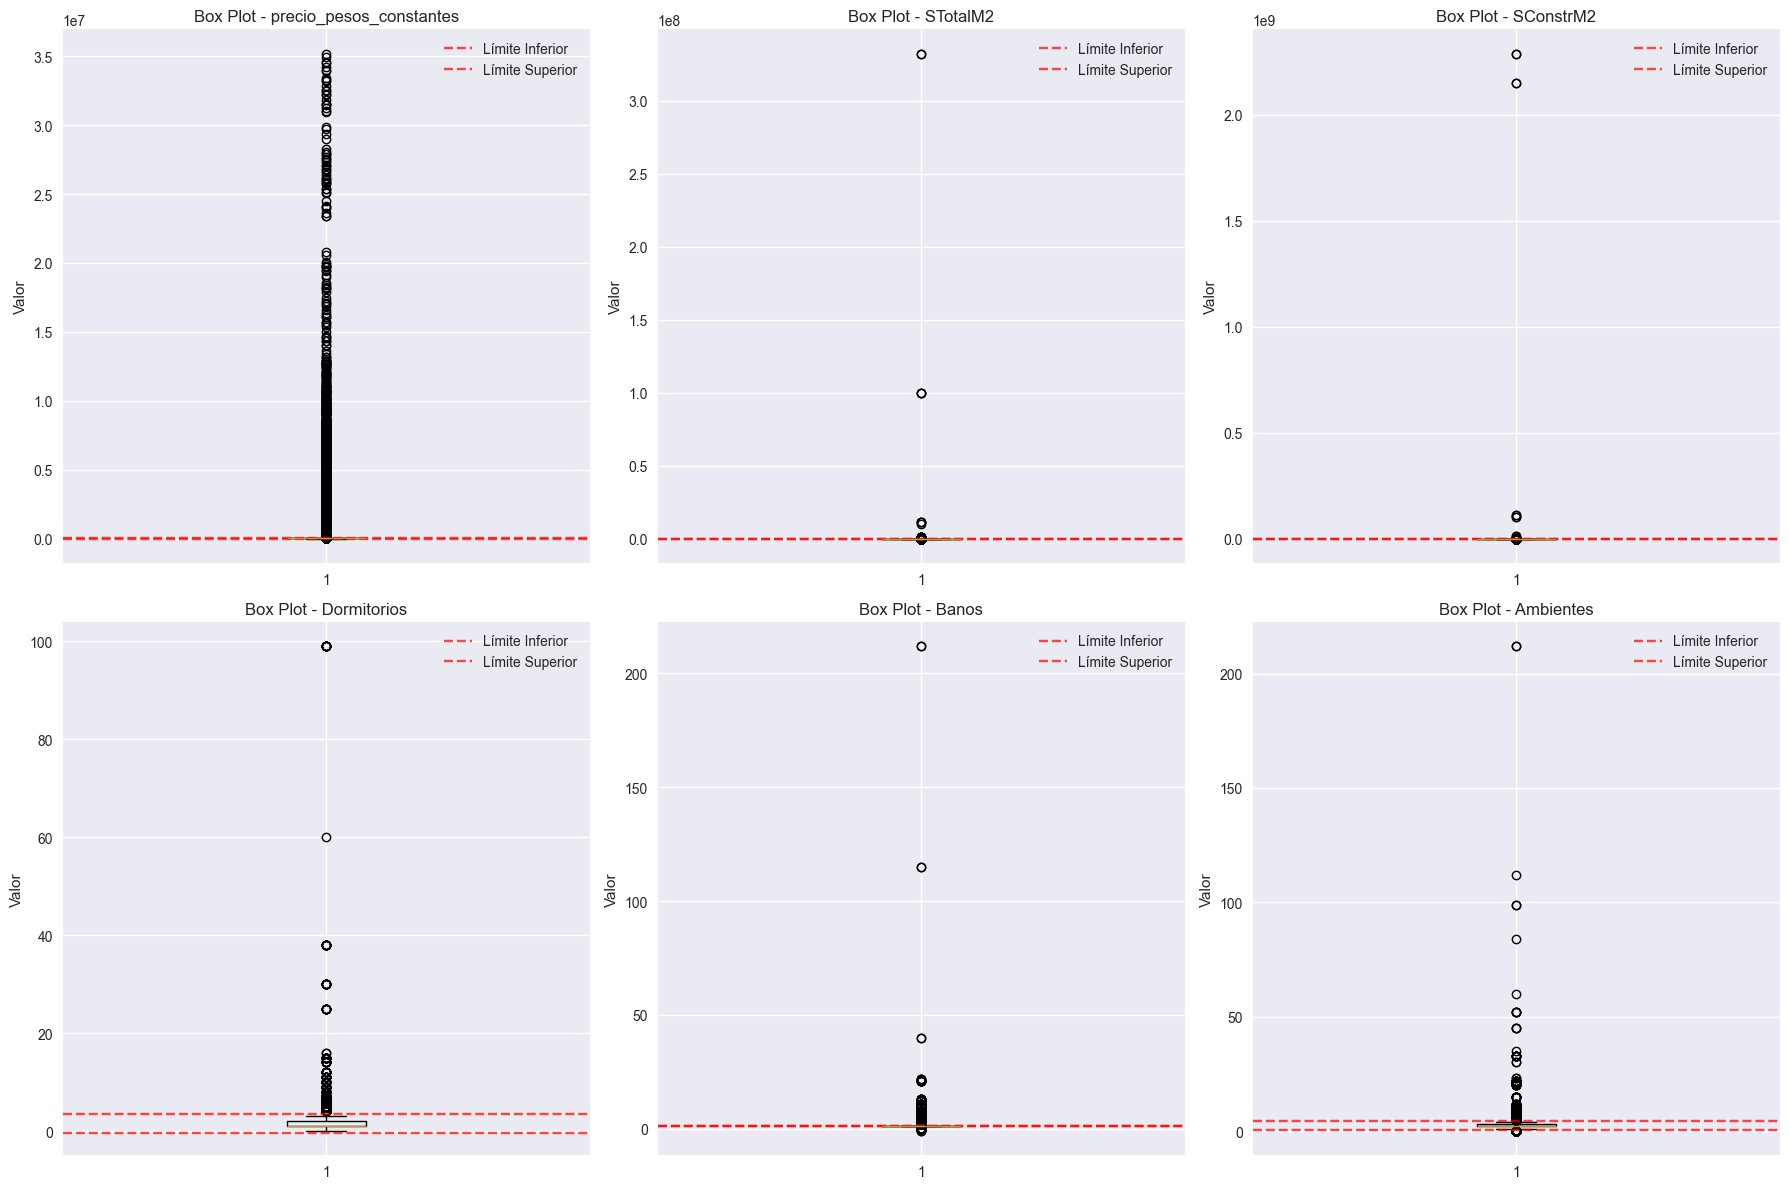

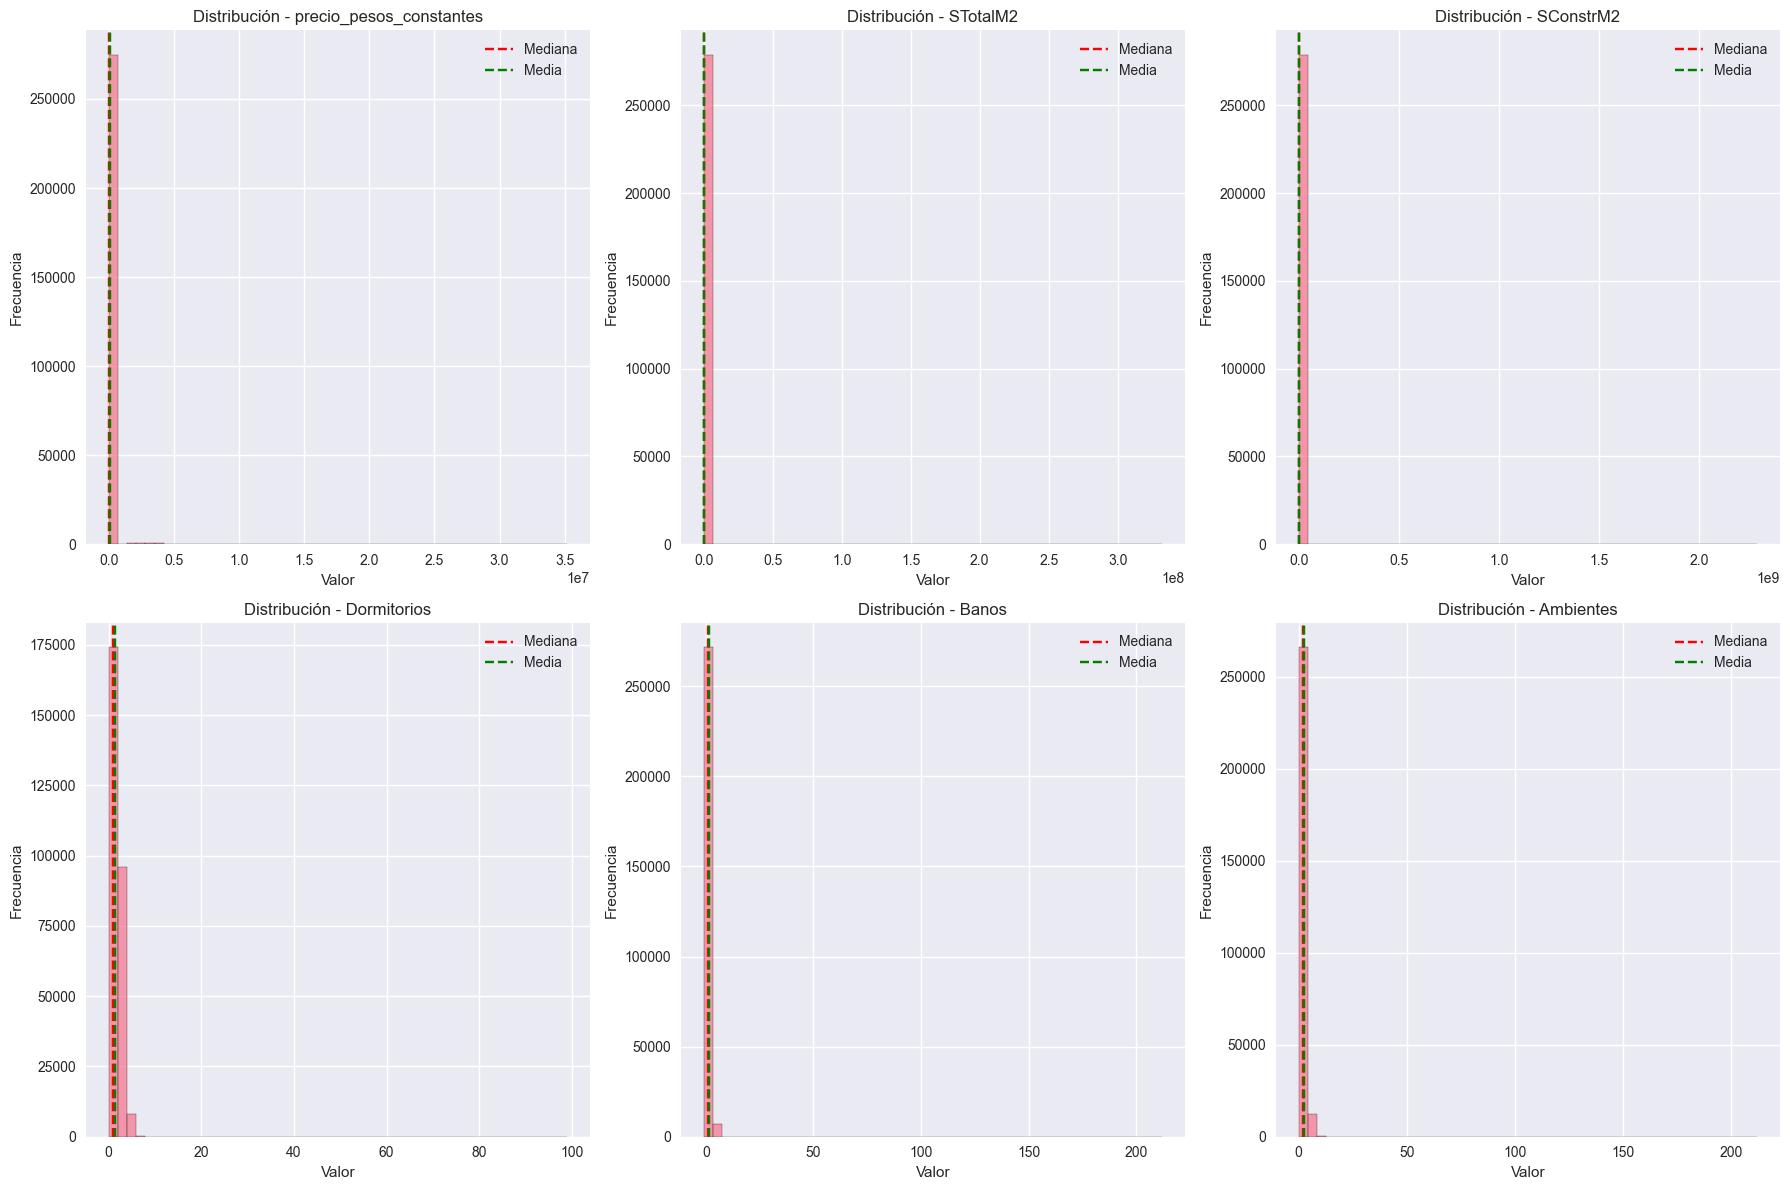

In [14]:
# Visualización de outliers para variables importantes
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(important_numeric_cols[:6]):
    if col in df.columns:
        # Box plot
        axes[i].boxplot(df[col].dropna())
        axes[i].set_title(f'Box Plot - {col}')
        axes[i].set_ylabel('Valor')
        
        # Añadir estadísticas
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        axes[i].axhline(y=lower_bound, color='r', linestyle='--', alpha=0.7, label='Límite Inferior')
        axes[i].axhline(y=upper_bound, color='r', linestyle='--', alpha=0.7, label='Límite Superior')
        axes[i].legend()

plt.tight_layout()
plt.show()

# Histogramas para variables importantes
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(important_numeric_cols[:6]):
    if col in df.columns:
        axes[i].hist(df[col].dropna(), bins=50, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribución - {col}')
        axes[i].set_xlabel('Valor')
        axes[i].set_ylabel('Frecuencia')
        
        # Añadir líneas de percentiles
        axes[i].axvline(df[col].median(), color='red', linestyle='--', label='Mediana')
        axes[i].axvline(df[col].mean(), color='green', linestyle='--', label='Media')
        axes[i].legend()

plt.tight_layout()
plt.show()


### 2.5 Visualizaciones Iniciales


=== HISTOGRAMAS DE VARIABLES NUMÉRICAS ===


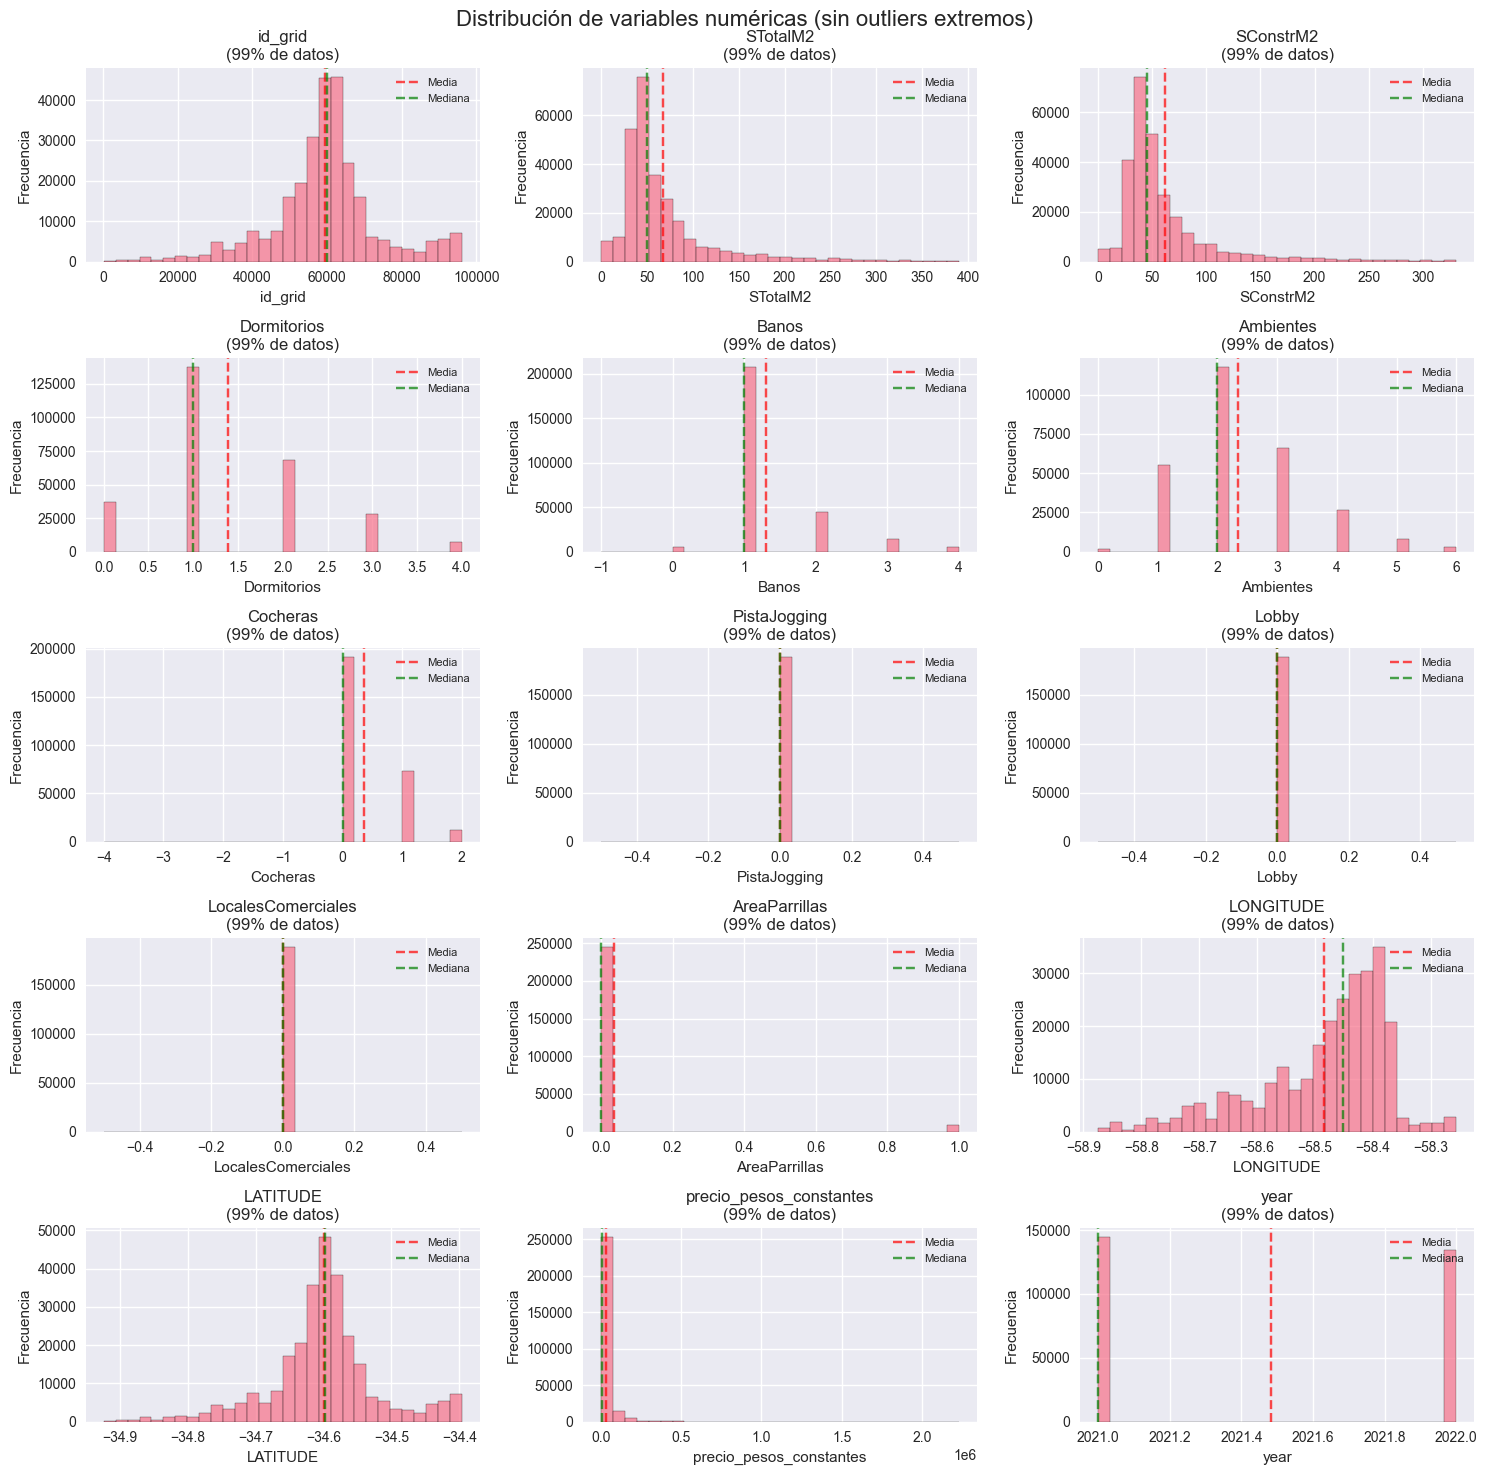


=== BOXPLOTS DE VARIABLES NUMÉRICAS ===


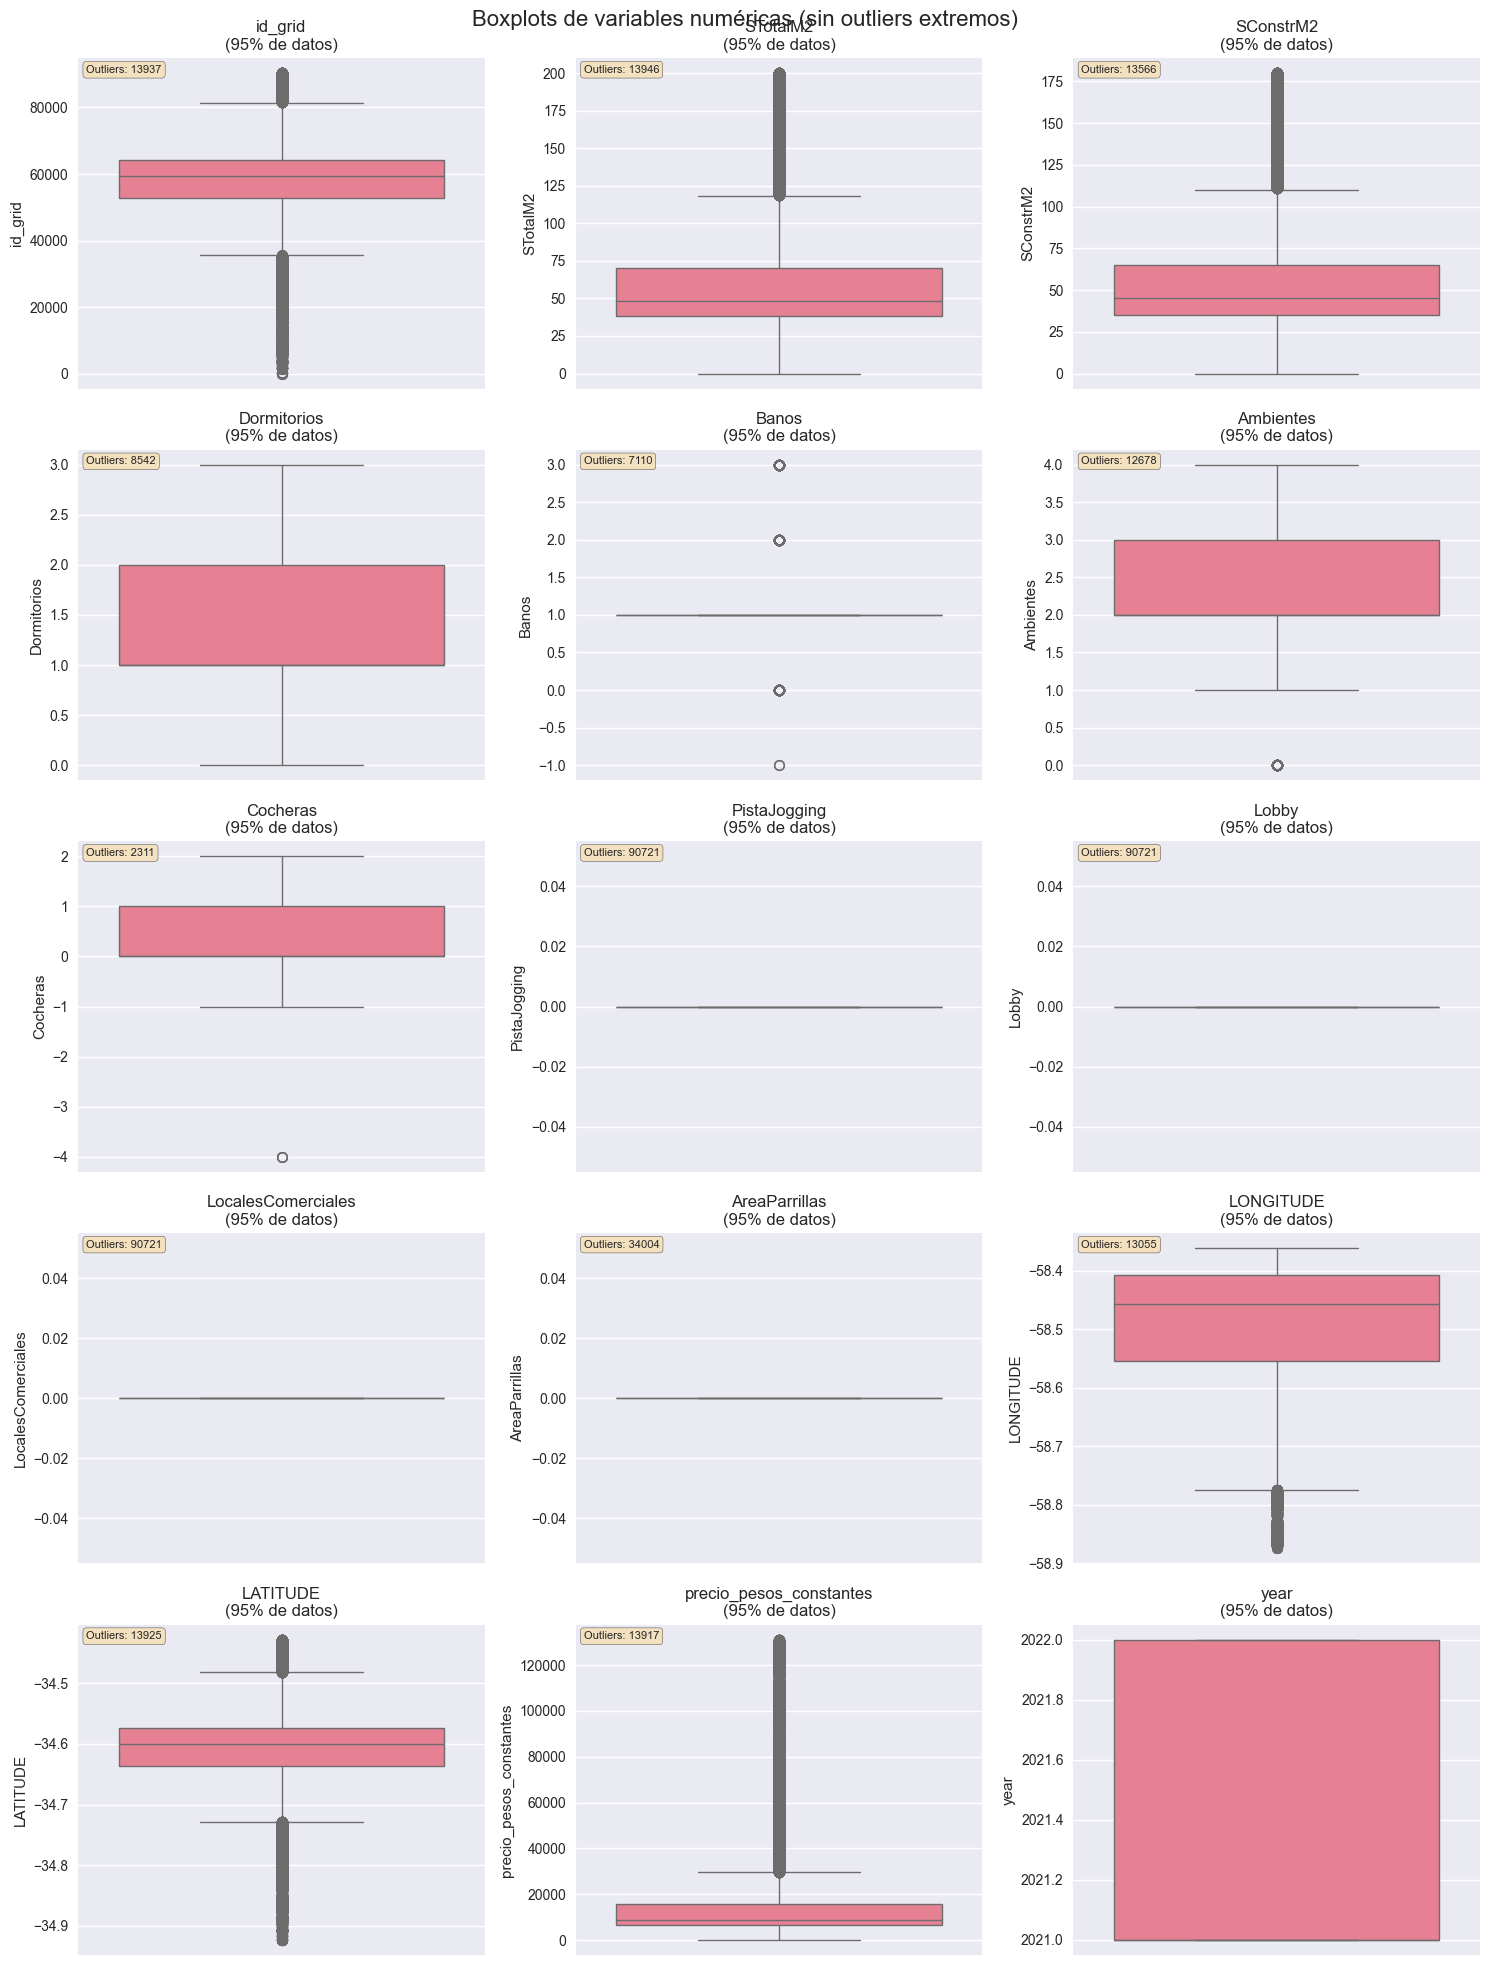


=== MATRIZ DE CORRELACIÓN ===


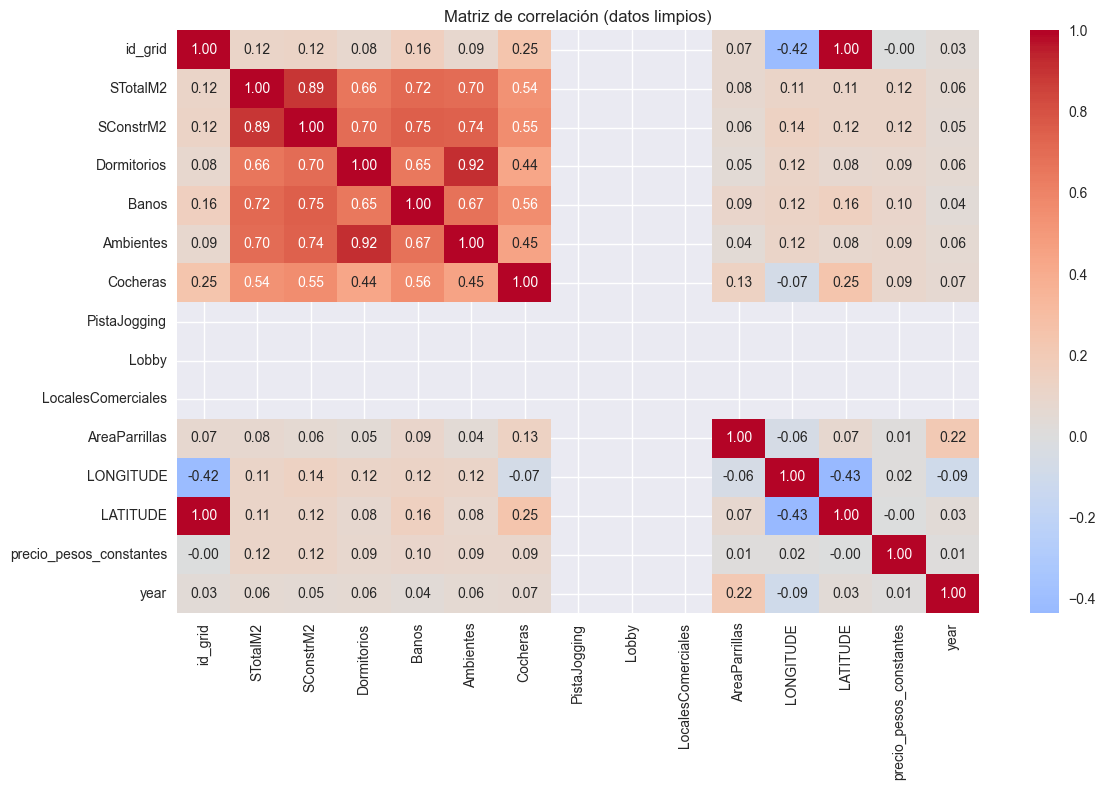


=== ANÁLISIS ESPECÍFICO DE PRECIOS ===


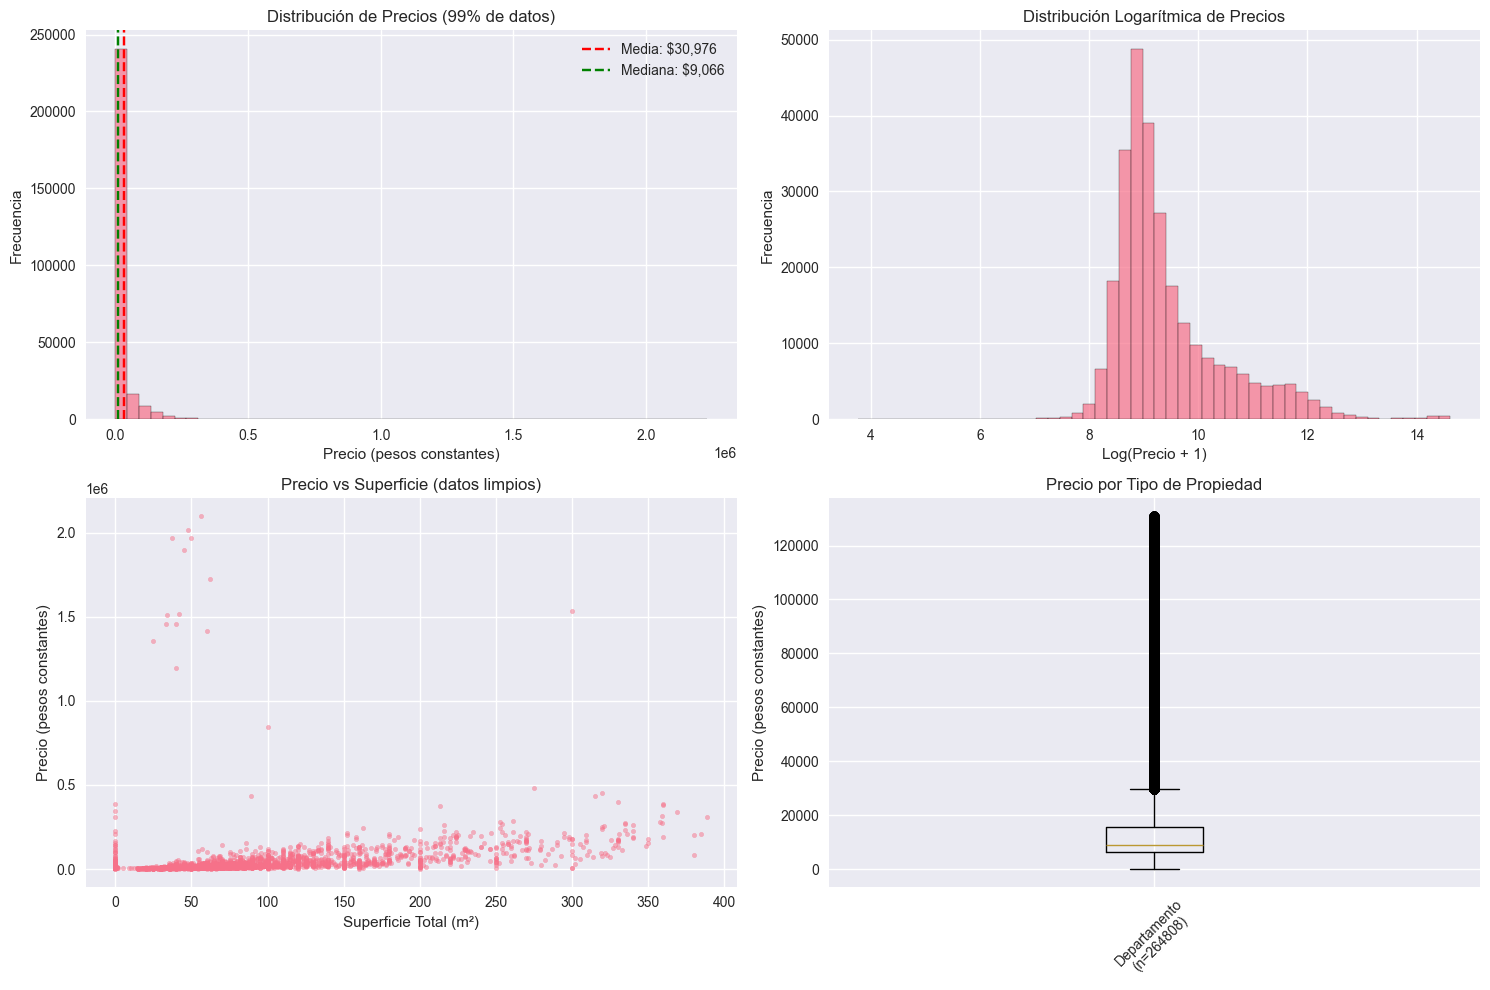


=== RESUMEN DE LIMPIEZA PARA VISUALIZACIÓN ===
id_grid: Removidos 1865 outliers extremos (0.7%)
STotalM2: Removidos 2790 outliers extremos (1.0%)
SConstrM2: Removidos 2801 outliers extremos (1.0%)
Dormitorios: Removidos 1692 outliers extremos (0.6%)
Banos: Removidos 2246 outliers extremos (0.8%)
Ambientes: Removidos 1668 outliers extremos (0.6%)
Cocheras: Removidos 2311 outliers extremos (0.8%)
PistaJogging: Removidos 90721 outliers extremos (32.5%)
Lobby: Removidos 90721 outliers extremos (32.5%)
LocalesComerciales: Removidos 90721 outliers extremos (32.5%)
AreaParrillas: Removidos 25049 outliers extremos (9.0%)
LONGITUDE: Removidos 2729 outliers extremos (1.0%)
LATITUDE: Removidos 2479 outliers extremos (0.9%)
precio_pesos_constantes: Removidos 2788 outliers extremos (1.0%)
year: Removidos 0 outliers extremos (0.0%)


In [ ]:
# Histogramas de distribuciones de variables numéricas (versión mejorada)
print("=== HISTOGRAMAS DE VARIABLES NUMÉRICAS ===")

# Función para limpiar datos antes de visualizar
def clean_for_visualization(data, column, max_percentile=99):
    """Limpia datos para visualización eliminando outliers extremos"""
    numeric_data = pd.to_numeric(data[column], errors='coerce')
    upper_limit = numeric_data.quantile(max_percentile / 100)
    return numeric_data[numeric_data <= upper_limit].dropna()

# Calcular el layout automáticamente basado en el número de columnas
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3

# Crear histogramas con datos limpios
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 3))
axes_flat = axes.flatten() if n_rows > 1 else axes.reshape(1, -1).flatten()

for i, col in enumerate(numeric_cols):
    if i < len(axes_flat):
        # Limpiar datos para visualización
        clean_data = clean_for_visualization(df, col, max_percentile=99)
        
        if len(clean_data) > 0:
            axes_flat[i].hist(clean_data, bins=30, alpha=0.7, edgecolor='black')
            axes_flat[i].set_title(f'{col}\n(99% de datos)')
            axes_flat[i].set_xlabel(col)
            axes_flat[i].set_ylabel('Frecuencia')
            
            # Añadir estadísticas
            axes_flat[i].axvline(clean_data.mean(), color='red', linestyle='--', alpha=0.7, label='Media')
            axes_flat[i].axvline(clean_data.median(), color='green', linestyle='--', alpha=0.7, label='Mediana')
            axes_flat[i].legend(fontsize=8)
        else:
            axes_flat[i].text(0.5, 0.5, 'Sin datos válidos', ha='center', va='center', transform=axes_flat[i].transAxes)
            axes_flat[i].set_title(col)
    else:
        axes_flat[i].axis('off')

plt.suptitle('Distribución de variables numéricas (sin outliers extremos)', fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots verticales mejorados
print("\n=== BOXPLOTS DE VARIABLES NUMÉRICAS ===")
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
axes_flat = axes.flatten() if n_rows > 1 else axes.reshape(1, -1).flatten()

for i, col in enumerate(numeric_cols):
    if i < len(axes_flat):
        # Limpiar datos para boxplot
        clean_data = clean_for_visualization(df, col, max_percentile=95)
        
        if len(clean_data) > 0:
            sns.boxplot(y=clean_data, ax=axes_flat[i])
            axes_flat[i].set_title(f'{col}\n(95% de datos)')
            
            # Añadir información de outliers
            total_outliers = len(df) - len(clean_data)
            if total_outliers > 0:
                axes_flat[i].text(0.02, 0.98, f'Outliers: {total_outliers}', 
                                transform=axes_flat[i].transAxes, fontsize=8, 
                                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        else:
            axes_flat[i].text(0.5, 0.5, 'Sin datos válidos', ha='center', va='center', transform=axes_flat[i].transAxes)
            axes_flat[i].set_title(col)
    else:
        axes_flat[i].axis('off')

plt.suptitle('Boxplots de variables numéricas (sin outliers extremos)', fontsize=16)
plt.tight_layout()
plt.show()

# Matriz de correlación mejorada
print("\n=== MATRIZ DE CORRELACIÓN ===")

# Limpiar datos para correlación
df_clean_corr = df.copy()
for col in numeric_cols:
    if col in df_clean_corr.columns:
        # Remover outliers extremos para correlación
        numeric_data = pd.to_numeric(df_clean_corr[col], errors='coerce')
        upper_limit = numeric_data.quantile(0.99)
        lower_limit = numeric_data.quantile(0.01)
        df_clean_corr[col] = numeric_data.clip(lower=lower_limit, upper=upper_limit)

plt.figure(figsize=(12, 8))
correlation_matrix = df_clean_corr[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación (datos limpios)")
plt.tight_layout()
plt.show()

# Análisis específico de la variable target con escalas apropiadas
print("\n=== ANÁLISIS ESPECÍFICO DE PRECIOS ===")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Precio completo vs precio limpio
clean_prices = clean_for_visualization(df, 'precio_pesos_constantes', 99)
axes[0, 0].hist(clean_prices, bins=50, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribución de Precios (99% de datos)')
axes[0, 0].set_xlabel('Precio (pesos constantes)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(clean_prices.mean(), color='red', linestyle='--', label=f'Media: ${clean_prices.mean():,.0f}')
axes[0, 0].axvline(clean_prices.median(), color='green', linestyle='--', label=f'Mediana: ${clean_prices.median():,.0f}')
axes[0, 0].legend()

# Precio logarítmico
log_prices = np.log1p(clean_prices)
axes[0, 1].hist(log_prices, bins=50, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribución Logarítmica de Precios')
axes[0, 1].set_xlabel('Log(Precio + 1)')
axes[0, 1].set_ylabel('Frecuencia')

# Precio vs Superficie (datos limpios)
clean_surface = clean_for_visualization(df, 'STotalM2', 99)
# Muestrear para mejor visualización
sample_size = min(5000, len(df))
sample_df = df.sample(n=sample_size, random_state=42)
sample_clean = sample_df[
    (sample_df['precio_pesos_constantes'] <= sample_df['precio_pesos_constantes'].quantile(0.99)) &
    (sample_df['STotalM2'] <= sample_df['STotalM2'].quantile(0.99))
]

axes[1, 0].scatter(sample_clean['STotalM2'], sample_clean['precio_pesos_constantes'], 
                   alpha=0.5, s=10)
axes[1, 0].set_title('Precio vs Superficie (datos limpios)')
axes[1, 0].set_xlabel('Superficie Total (m²)')
axes[1, 0].set_ylabel('Precio (pesos constantes)')

# Boxplot de precios por tipo de propiedad
if 'TIPOPROPIEDAD' in df.columns:
    prop_types = df['TIPOPROPIEDAD'].value_counts().head(3).index
    clean_data_list = []
    labels = []
    
    for prop_type in prop_types:
        type_data = df[df['TIPOPROPIEDAD'] == prop_type]['precio_pesos_constantes']
        clean_type_data = clean_for_visualization(df[df['TIPOPROPIEDAD'] == prop_type], 'precio_pesos_constantes', 95)
        if len(clean_type_data) > 0:
            clean_data_list.append(clean_type_data)
            labels.append(f'{prop_type}\n(n={len(clean_type_data)})')
    
    if clean_data_list:
        axes[1, 1].boxplot(clean_data_list, labels=labels)
        axes[1, 1].set_title('Precio por Tipo de Propiedad')
        axes[1, 1].set_ylabel('Precio (pesos constantes)')
        axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Resumen de limpieza aplicada
print("\n=== RESUMEN DE LIMPIEZA PARA VISUALIZACIÓN ===")
for col in numeric_cols:
    if col in df.columns:
        original_count = len(df)
        clean_count = len(clean_for_visualization(df, col, 99))
        removed_count = original_count - clean_count
        print(f"{col}: Removidos {removed_count} outliers extremos ({removed_count/original_count*100:.1f}%)")

=== ANÁLISIS ESPECÍFICO DE VARIABLES CLAVE ===


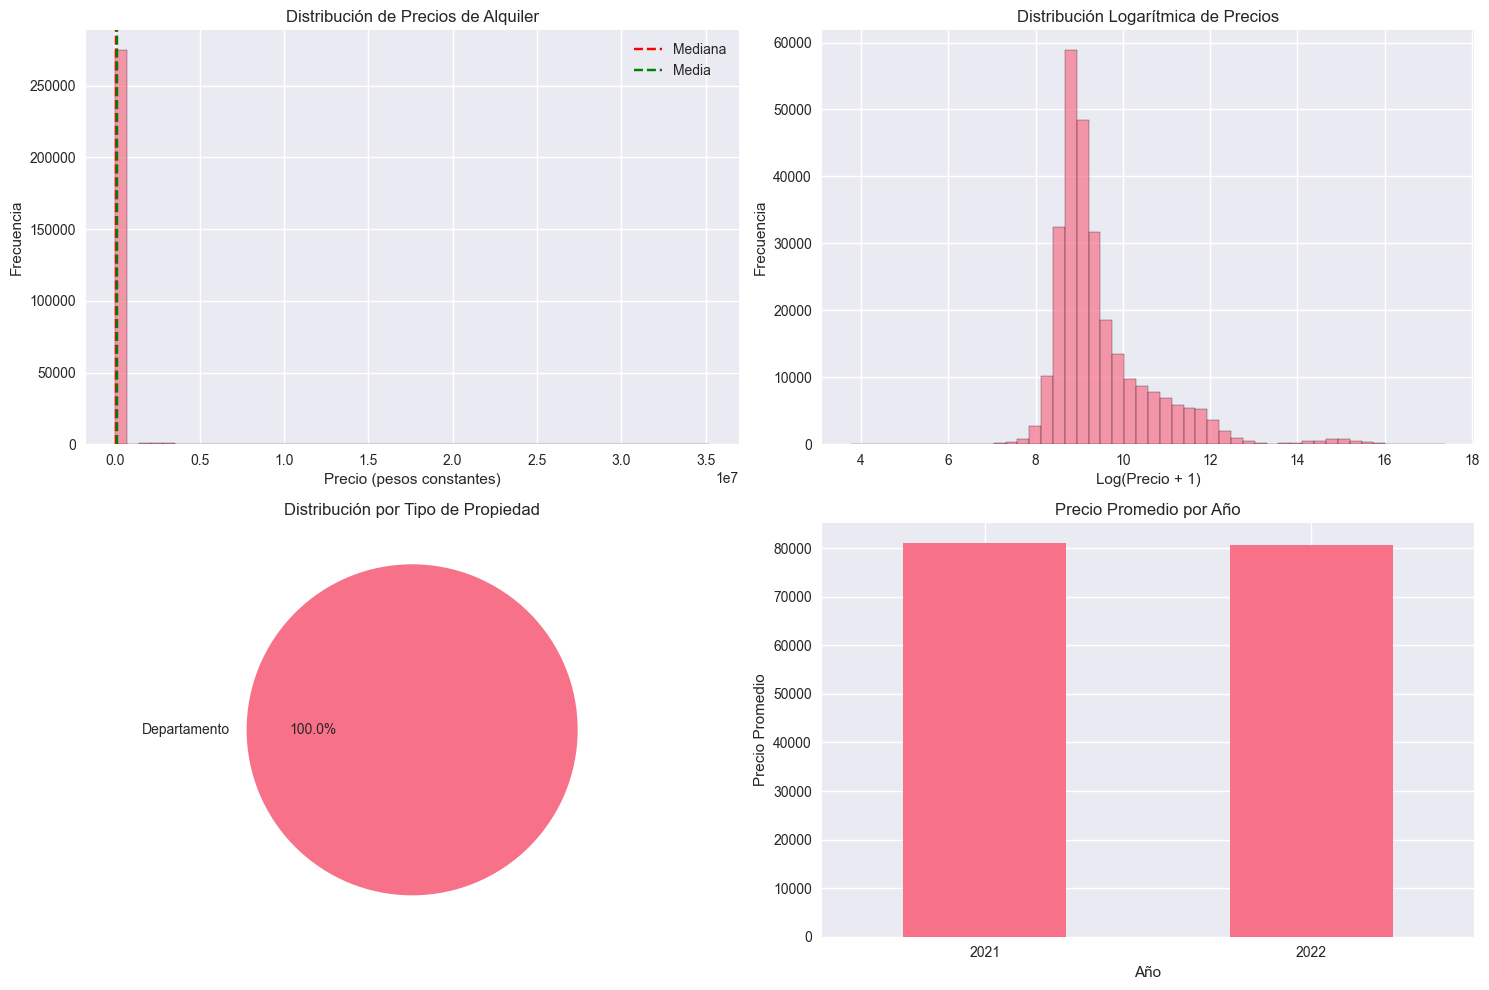


=== ANÁLISIS DE CORRELACIONES ESPECÍFICAS ===


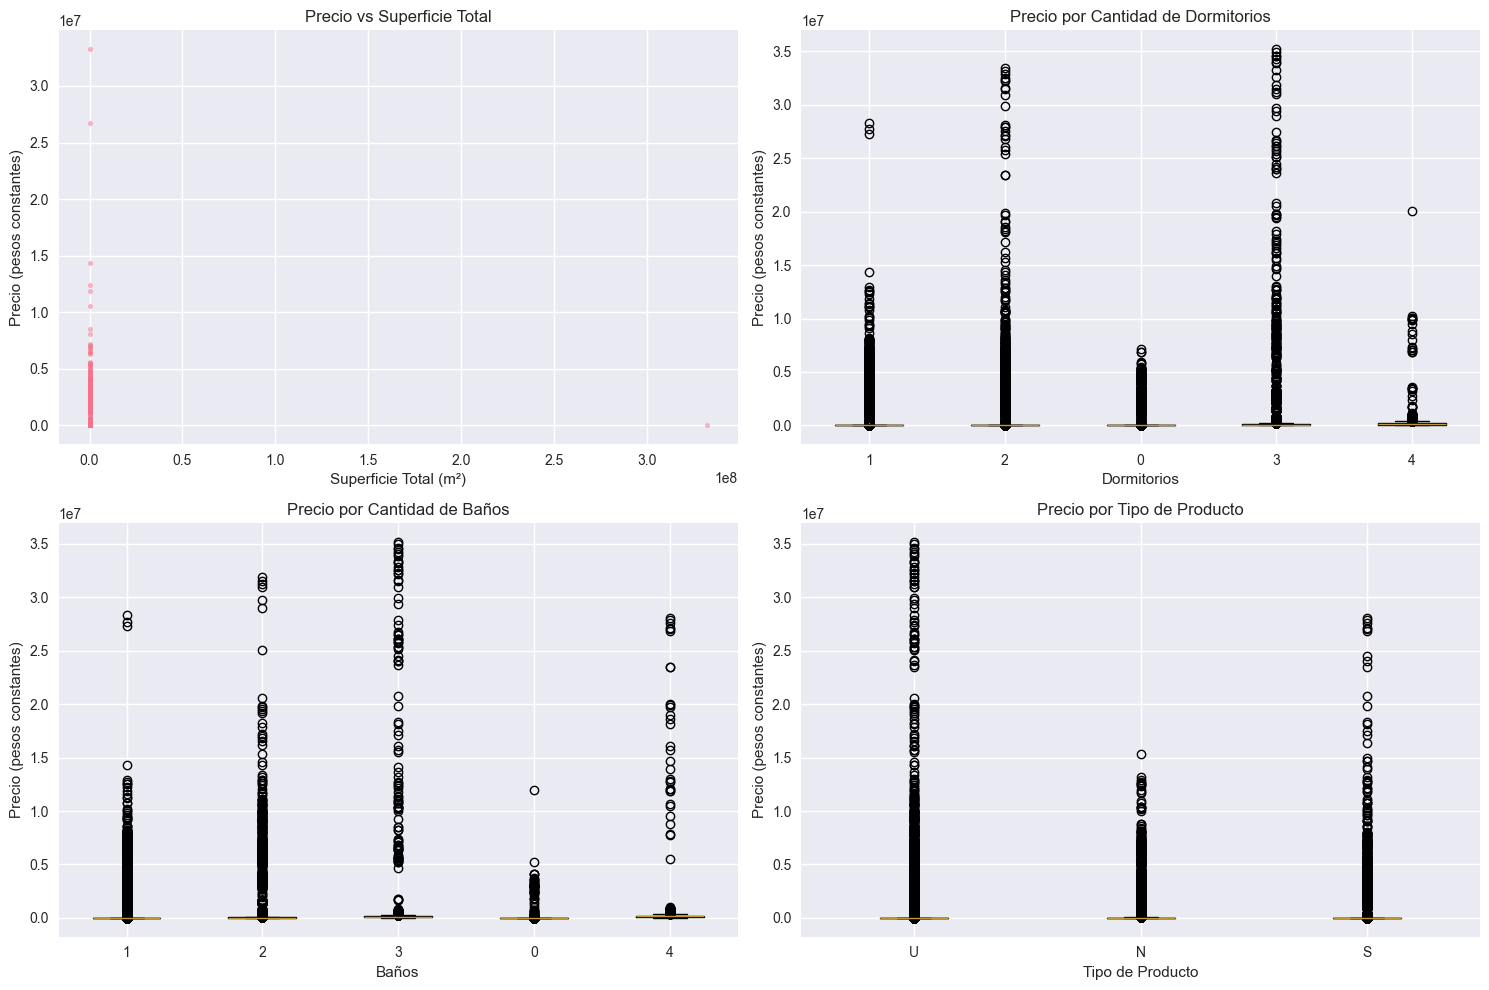

In [16]:
# Análisis específico de la variable target y variables categóricas importantes
print("=== ANÁLISIS ESPECÍFICO DE VARIABLES CLAVE ===")

# Análisis detallado de la variable target (precio)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribución del precio
axes[0, 0].hist(df['precio_pesos_constantes'], bins=50, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribución de Precios de Alquiler')
axes[0, 0].set_xlabel('Precio (pesos constantes)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(df['precio_pesos_constantes'].median(), color='red', linestyle='--', label='Mediana')
axes[0, 0].axvline(df['precio_pesos_constantes'].mean(), color='green', linestyle='--', label='Media')
axes[0, 0].legend()

# Distribución logarítmica del precio
log_prices = np.log1p(df['precio_pesos_constantes'])
axes[0, 1].hist(log_prices, bins=50, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribución Logarítmica de Precios')
axes[0, 1].set_xlabel('Log(Precio + 1)')
axes[0, 1].set_ylabel('Frecuencia')

# Precio por tipo de propiedad
if 'TIPOPROPIEDAD' in df.columns:
    prop_type_counts = df['TIPOPROPIEDAD'].value_counts()
    axes[1, 0].pie(prop_type_counts.values, labels=prop_type_counts.index, autopct='%1.1f%%')
    axes[1, 0].set_title('Distribución por Tipo de Propiedad')

# Precio por año
if 'year' in df.columns:
    yearly_avg = df.groupby('year')['precio_pesos_constantes'].mean()
    yearly_avg.plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title('Precio Promedio por Año')
    axes[1, 1].set_xlabel('Año')
    axes[1, 1].set_ylabel('Precio Promedio')
    axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Análisis de correlaciones específicas
print("\n=== ANÁLISIS DE CORRELACIONES ESPECÍFICAS ===")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Precio vs superficie
if 'STotalM2' in df.columns:
    sample_size = min(10000, len(df))
    sample_df = df.sample(n=sample_size, random_state=42)
    axes[0, 0].scatter(sample_df['STotalM2'], sample_df['precio_pesos_constantes'], alpha=0.5, s=10)
    axes[0, 0].set_title('Precio vs Superficie Total')
    axes[0, 0].set_xlabel('Superficie Total (m²)')
    axes[0, 0].set_ylabel('Precio (pesos constantes)')

# Box plot de precios por dormitorios
if 'Dormitorios' in df.columns:
    dorm_counts = df['Dormitorios'].value_counts().head(5)
    dorm_data = [df[df['Dormitorios'] == dorm]['precio_pesos_constantes'].values 
                 for dorm in dorm_counts.index]
    axes[0, 1].boxplot(dorm_data, labels=dorm_counts.index)
    axes[0, 1].set_title('Precio por Cantidad de Dormitorios')
    axes[0, 1].set_xlabel('Dormitorios')
    axes[0, 1].set_ylabel('Precio (pesos constantes)')

# Box plot de precios por baños
if 'Banos' in df.columns:
    banos_counts = df['Banos'].value_counts().head(5)
    banos_data = [df[df['Banos'] == banos]['precio_pesos_constantes'].values 
                  for banos in banos_counts.index]
    axes[1, 0].boxplot(banos_data, labels=banos_counts.index)
    axes[1, 0].set_title('Precio por Cantidad de Baños')
    axes[1, 0].set_xlabel('Baños')
    axes[1, 0].set_ylabel('Precio (pesos constantes)')

# Distribución de precios por tipo de producto
if 'ITE_TIPO_PROD' in df.columns:
    tipo_counts = df['ITE_TIPO_PROD'].value_counts()
    tipo_data = [df[df['ITE_TIPO_PROD'] == tipo]['precio_pesos_constantes'].values 
                 for tipo in tipo_counts.index]
    axes[1, 1].boxplot(tipo_data, labels=tipo_counts.index)
    axes[1, 1].set_title('Precio por Tipo de Producto')
    axes[1, 1].set_xlabel('Tipo de Producto')
    axes[1, 1].set_ylabel('Precio (pesos constantes)')

plt.tight_layout()
plt.show()


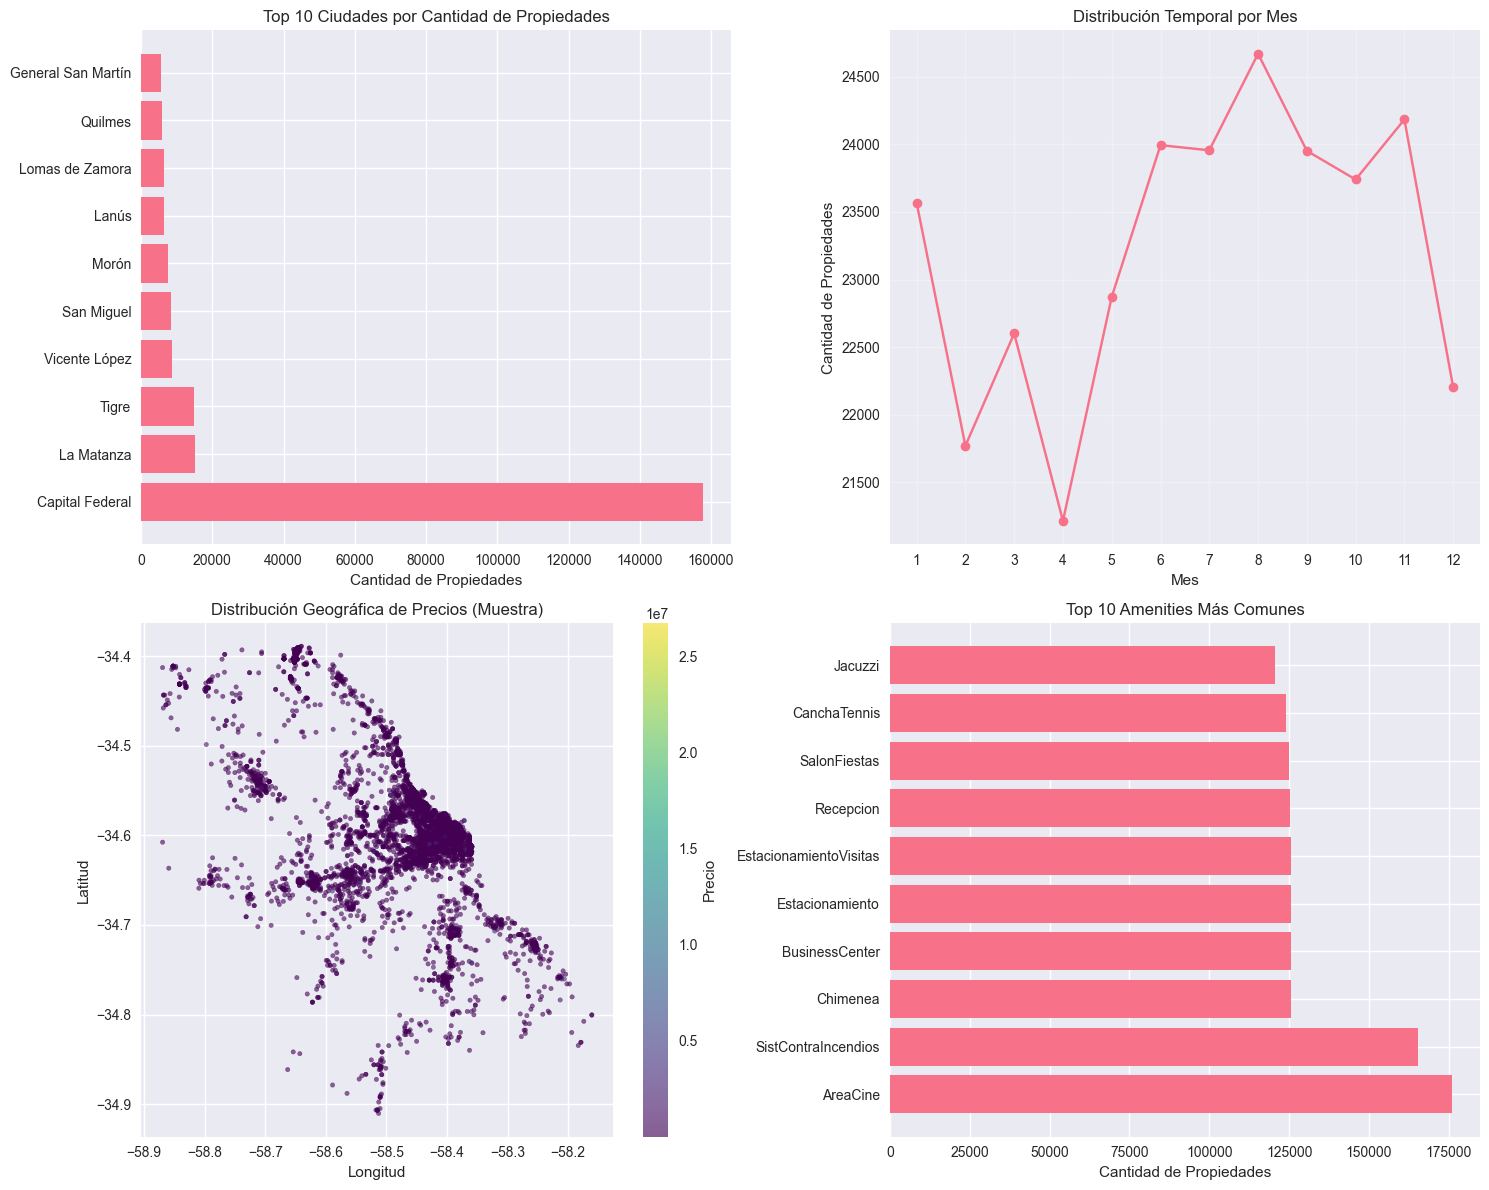

In [17]:
# Análisis geográfico y temporal
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribución por ciudad
if 'ITE_ADD_CITY_NAME' in df.columns:
    city_counts = df['ITE_ADD_CITY_NAME'].value_counts().head(10)
    axes[0, 0].barh(range(len(city_counts)), city_counts.values)
    axes[0, 0].set_yticks(range(len(city_counts)))
    axes[0, 0].set_yticklabels(city_counts.index)
    axes[0, 0].set_title('Top 10 Ciudades por Cantidad de Propiedades')
    axes[0, 0].set_xlabel('Cantidad de Propiedades')

# Distribución temporal por mes
if 'MesListing' in df.columns:
    # Convertir a datetime si es necesario
    df_temp = df.copy()
    df_temp['MesListing'] = pd.to_datetime(df_temp['MesListing'])
    monthly_counts = df_temp['MesListing'].dt.month.value_counts().sort_index()
    axes[0, 1].plot(monthly_counts.index, monthly_counts.values, marker='o')
    axes[0, 1].set_title('Distribución Temporal por Mes')
    axes[0, 1].set_xlabel('Mes')
    axes[0, 1].set_ylabel('Cantidad de Propiedades')
    axes[0, 1].set_xticks(range(1, 13))
    axes[0, 1].grid(True, alpha=0.3)

# Mapa de calor de precios por ubicación (muestra)
if 'LONGITUDE' in df.columns and 'LATITUDE' in df.columns:
    # Muestrear para visualización
    sample_size = min(5000, len(df))
    sample_df = df.sample(n=sample_size, random_state=42)
    
    scatter = axes[1, 0].scatter(sample_df['LONGITUDE'], sample_df['LATITUDE'], 
                                c=sample_df['precio_pesos_constantes'], 
                                cmap='viridis', alpha=0.6, s=10)
    axes[1, 0].set_title('Distribución Geográfica de Precios (Muestra)')
    axes[1, 0].set_xlabel('Longitud')
    axes[1, 0].set_ylabel('Latitud')
    plt.colorbar(scatter, ax=axes[1, 0], label='Precio')

# Análisis de amenities más comunes
amenity_cols = [col for col in df.columns if col not in ['id_grid', 'MesListing', 'TIPOPROPIEDAD', 
                                                         'STotalM2', 'SConstrM2', 'Dormitorios', 
                                                         'Banos', 'Ambientes', 'SitioOrigen', 
                                                         'Amoblado', 'Antiguedad', 'ITE_ADD_CITY_NAME',
                                                         'ITE_ADD_STATE_NAME', 'ITE_ADD_NEIGHBORHOOD_NAME',
                                                         'ITE_TIPO_PROD', 'LONGITUDE', 'LATITUDE', 
                                                         'precio_pesos_constantes', 'year']]

# Calcular frecuencia de amenities
amenity_freq = {}
for col in amenity_cols:
    if df[col].dtype in ['object', 'string']:
        # Para variables categóricas, contar valores positivos
        positive_values = df[col].value_counts()
        if len(positive_values) > 0:
            amenity_freq[col] = positive_values.iloc[0]  # Tomar el valor más frecuente
    else:
        # Para variables numéricas, contar valores > 0
        amenity_freq[col] = (df[col] > 0).sum()

# Top 10 amenities más comunes
top_amenities = sorted(amenity_freq.items(), key=lambda x: x[1], reverse=True)[:10]
amenity_names = [item[0] for item in top_amenities]
amenity_counts = [item[1] for item in top_amenities]

axes[1, 1].barh(range(len(amenity_names)), amenity_counts)
axes[1, 1].set_yticks(range(len(amenity_names)))
axes[1, 1].set_yticklabels(amenity_names)
axes[1, 1].set_title('Top 10 Amenities Más Comunes')
axes[1, 1].set_xlabel('Cantidad de Propiedades')

plt.tight_layout()
plt.show()


In [26]:
# Diagnóstico completo de calidad de datos
print("=== DIAGNÓSTICO DE CALIDAD DE DATOS ===")

# 1. Análisis de duplicados
print("\n1. ANÁLISIS DE DUPLICADOS:")
print(f"Registros duplicados exactos: {df.duplicated().sum()}")
print(f"Porcentaje de duplicados: {(df.duplicated().sum() / len(df)) * 100:.2f}%")

# Verificar duplicados por columnas clave (sin incluir id_grid que debería ser único)
key_columns = ['TIPOPROPIEDAD', 'STotalM2', 'Dormitorios', 'Banos', 'LONGITUDE', 'LATITUDE', 'precio_pesos_constantes']
duplicates_key = df.duplicated(subset=key_columns).sum()
print(f"Duplicados por características clave: {duplicates_key}")
print(f"Porcentaje de duplicados por características: {(duplicates_key / len(df)) * 100:.2f}%")

# 2. Análisis de inconsistencias en datos numéricos
print("\n2. INCONSISTENCIAS EN DATOS NUMÉRICOS:")

# Verificar valores negativos donde no deberían existir
negative_checks = {
    'STotalM2': (df['STotalM2'] < 0).sum(),
    'SConstrM2': (df['SConstrM2'] < 0).sum(),
    'Dormitorios': (df['Dormitorios'] < 0).sum(),
    'Banos': (df['Banos'] < 0).sum(),
    'Ambientes': (df['Ambientes'] < 0).sum(),
    'Antiguedad': (df['Antiguedad'] < 0).sum(),
    'precio_pesos_constantes': (df['precio_pesos_constantes'] < 0).sum()
}

for col, count in negative_checks.items():
    if count > 0:
        print(f"  {col}: {count} valores negativos")
    else:
        print(f"  {col}: ✓ Sin valores negativos")

# Verificar relaciones lógicas
print("\n3. VERIFICACIÓN DE RELACIONES LÓGICAS:")

# Superficie construida no puede ser mayor que superficie total
if 'STotalM2' in df.columns and 'SConstrM2' in df.columns:
    illogical_surface = (df['SConstrM2'] > df['STotalM2']).sum()
    print(f"  Superficie construida > Superficie total: {illogical_surface} casos")

# Baños no puede ser mayor que ambientes
if 'Banos' in df.columns and 'Ambientes' in df.columns:
    illogical_bathrooms = (df['Banos'] > df['Ambientes']).sum()
    print(f"  Baños > Ambientes: {illogical_bathrooms} casos")

# Dormitorios no puede ser mayor que ambientes
if 'Dormitorios' in df.columns and 'Ambientes' in df.columns:
    illogical_bedrooms = (df['Dormitorios'] > df['Ambientes']).sum()
    print(f"  Dormitorios > Ambientes: {illogical_bedrooms} casos")

# 4. Análisis de valores extremos
print("\n4. VALORES EXTREMOS:")
extreme_values = {
    'STotalM2': ((df['STotalM2'] > 1000) | (df['STotalM2'] < 10)).sum(),
    'SConstrM2': ((df['SConstrM2'] > 1000) | (df['SConstrM2'] < 5)).sum(),
    'Dormitorios': (df['Dormitorios'] > 10).sum(),
    'Banos': (df['Banos'] > 10).sum(),
    'Ambientes': (df['Ambientes'] > 20).sum(),
    'Antiguedad': (df['Antiguedad'] > 100).sum(),
    'precio_pesos_constantes': ((df['precio_pesos_constantes'] > 1000000) | (df['precio_pesos_constantes'] < 1000)).sum()
}

for col, count in extreme_values.items():
    if count > 0:
        print(f"  {col}: {count} valores extremos")

# 5. Análisis de datos categóricos inconsistentes
print("\n5. INCONSISTENCIAS EN DATOS CATEGÓRICOS:")

# Verificar valores únicos en columnas categóricas
for col in categorical_cols:
    unique_vals = df[col].nunique()
    total_vals = len(df[col].dropna())
    if unique_vals > total_vals * 0.8:  # Si hay muchos valores únicos
        print(f"  {col}: {unique_vals} valores únicos de {total_vals} ({unique_vals/total_vals*100:.1f}%)")

print("\n=== RESUMEN DEL DIAGNÓSTICO ===")
print("Problemas identificados:")
print("1. Duplicados exactos:", df.duplicated().sum())
print("2. Duplicados por características:", duplicates_key)
print("3. Valores negativos en variables físicas:", sum(negative_checks.values()))
print("4. Relaciones lógicas inconsistentes:", illogical_surface + illogical_bathrooms + illogical_bedrooms)
print("5. Valores extremos:", sum(extreme_values.values()))


=== DIAGNÓSTICO DE CALIDAD DE DATOS ===

1. ANÁLISIS DE DUPLICADOS:
Registros duplicados exactos: 7040
Porcentaje de duplicados: 2.53%
Duplicados por características clave: 15264
Porcentaje de duplicados por características: 5.48%

2. INCONSISTENCIAS EN DATOS NUMÉRICOS:


TypeError: '<' not supported between instances of 'str' and 'int'

### 3.2 Decisiones para Limpiar o Transformar los Datos


**Estrategias de limpieza identificadas:**

1. **Manejo de Duplicados:**
   - Eliminar registros duplicados exactos
   - Para duplicados por características, mantener el registro más reciente o con mejor calidad de datos

2. **Corrección de Inconsistencias Lógicas:**
   - Ajustar superficie construida cuando sea mayor que superficie total
   - Corregir relaciones entre baños/dormitorios y ambientes

3. **Manejo de Valores Extremos:**
   - Usar técnicas de winsorización para outliers extremos
   - Aplicar transformaciones logarítmicas para variables con sesgo positivo

4. **Estandarización de Variables Categóricas:**
   - Unificar formatos de texto (mayúsculas/minúsculas)
   - Agrupar categorías similares
   - Manejar valores faltantes en variables categóricas

5. **Creación de Variables Derivadas:**
   - Calcular precio por metro cuadrado
   - Crear indicadores de amenities premium
   - Generar variables de densidad de amenities


## 4. Transformaciones Realizadas

### 4.1 Limpieza de Datos


In [ ]:
# Crear una copia del dataset para las transformaciones
df_clean = df.copy()
print(f"Dataset original: {df.shape}")
print(f"Dataset limpio: {df_clean.shape}")

# 1. Eliminar duplicados exactos
print("\n=== PASO 1: ELIMINACIÓN DE DUPLICADOS ===")
duplicates_before = df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates()
duplicates_after = df_clean.duplicated().sum()
print(f"Duplicados eliminados: {duplicates_before - duplicates_after}")
print(f"Registros restantes: {len(df_clean)}")

# 2. Corrección de inconsistencias lógicas
print("\n=== PASO 2: CORRECCIÓN DE INCONSISTENCIAS LÓGICAS ===")

# Corregir superficie construida > superficie total
if 'STotalM2' in df_clean.columns and 'SConstrM2' in df_clean.columns:
    illogical_surface_before = (df_clean['SConstrM2'] > df_clean['STotalM2']).sum()
    df_clean.loc[df_clean['SConstrM2'] > df_clean['STotalM2'], 'SConstrM2'] = df_clean.loc[df_clean['SConstrM2'] > df_clean['STotalM2'], 'STotalM2']
    illogical_surface_after = (df_clean['SConstrM2'] > df_clean['STotalM2']).sum()
    print(f"Superficie construida corregida: {illogical_surface_before - illogical_surface_after} casos")

# Corregir baños > ambientes (limitar a ambientes - 1 para dejar espacio para otros ambientes)
if 'Banos' in df_clean.columns and 'Ambientes' in df_clean.columns:
    illogical_bathrooms_before = (df_clean['Banos'] > df_clean['Ambientes']).sum()
    df_clean.loc[df_clean['Banos'] > df_clean['Ambientes'], 'Banos'] = df_clean.loc[df_clean['Banos'] > df_clean['Ambientes'], 'Ambientes'] - 1
    df_clean.loc[df_clean['Banos'] < 0, 'Banos'] = 0  # Asegurar que no sea negativo
    illogical_bathrooms_after = (df_clean['Banos'] > df_clean['Ambientes']).sum()
    print(f"Baños corregidos: {illogical_bathrooms_before - illogical_bathrooms_after} casos")

# Corregir dormitorios > ambientes
if 'Dormitorios' in df_clean.columns and 'Ambientes' in df_clean.columns:
    illogical_bedrooms_before = (df_clean['Dormitorios'] > df_clean['Ambientes']).sum()
    df_clean.loc[df_clean['Dormitorios'] > df_clean['Ambientes'], 'Dormitorios'] = df_clean.loc[df_clean['Dormitorios'] > df_clean['Ambientes'], 'Ambientes'] - 1
    df_clean.loc[df_clean['Dormitorios'] < 0, 'Dormitorios'] = 0  # Asegurar que no sea negativo
    illogical_bedrooms_after = (df_clean['Dormitorios'] > df_clean['Ambientes']).sum()
    print(f"Dormitorios corregidos: {illogical_bedrooms_before - illogical_bedrooms_after} casos")

# 3. Manejo de valores extremos (Winsorización)
print("\n=== PASO 3: WINSORIZACIÓN DE VALORES EXTREMOS ===")

def winsorize_column(data, column, lower_percentile=0.01, upper_percentile=0.99):
    """Aplica winsorización a una columna"""
    lower_bound = data[column].quantile(lower_percentile)
    upper_bound = data[column].quantile(upper_percentile)
    
    outliers_before = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    
    outliers_after = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    
    return outliers_before, outliers_after

# Aplicar winsorización a variables importantes
winsorization_results = {}
winsorization_cols = ['STotalM2', 'SConstrM2', 'precio_pesos_constantes']

for col in winsorization_cols:
    if col in df_clean.columns:
        before, after = winsorize_column(df_clean, col)
        winsorization_results[col] = before - after
        print(f"{col}: {before - after} valores extremos ajustados")

print(f"\nDataset después de limpieza: {df_clean.shape}")


### 4.2 Normalización y Estandarización


In [ ]:
# 4. Estandarización de variables categóricas
print("\n=== PASO 4: ESTANDARIZACIÓN DE VARIABLES CATEGÓRICAS ===")

# Limpiar y estandarizar texto en variables categóricas
text_columns = ['TIPOPROPIEDAD', 'SitioOrigen', 'Amoblado', 'ITE_ADD_CITY_NAME', 
                'ITE_ADD_STATE_NAME', 'ITE_ADD_NEIGHBORHOOD_NAME', 'ITE_TIPO_PROD']

for col in text_columns:
    if col in df_clean.columns:
        # Convertir a string y limpiar espacios
        df_clean[col] = df_clean[col].astype(str).str.strip()
        
        # Unificar valores comunes
        if col == 'Amoblado':
            df_clean[col] = df_clean[col].replace(['Sí', 'Si', 'si', 'sí', '1', '1.0'], 'Sí')
            df_clean[col] = df_clean[col].replace(['No', 'no', '0', '0.0', 'nan'], 'No')
        
        print(f"{col}: {df_clean[col].nunique()} valores únicos después de limpieza")

# 5. Creación de variables derivadas
print("\n=== PASO 5: CREACIÓN DE VARIABLES DERIVADAS ===")

# Precio por metro cuadrado
if 'precio_pesos_constantes' in df_clean.columns and 'STotalM2' in df_clean.columns:
    df_clean['precio_por_m2'] = df_clean['precio_pesos_constantes'] / df_clean['STotalM2']
    df_clean.loc[df_clean['STotalM2'] <= 0, 'precio_por_m2'] = np.nan
    print("Variable creada: precio_por_m2")

# Densidad de amenities
amenity_cols = [col for col in df_clean.columns if col not in ['id_grid', 'MesListing', 'TIPOPROPIEDAD', 
                                                               'STotalM2', 'SConstrM2', 'Dormitorios', 
                                                               'Banos', 'Ambientes', 'SitioOrigen', 
                                                               'Amoblado', 'Antiguedad', 'ITE_ADD_CITY_NAME',
                                                               'ITE_ADD_STATE_NAME', 'ITE_ADD_NEIGHBORHOOD_NAME',
                                                               'ITE_TIPO_PROD', 'LONGITUDE', 'LATITUDE', 
                                                               'precio_pesos_constantes', 'year', 'precio_por_m2']]

# Convertir amenities a binarias (0/1)
for col in amenity_cols:
    if col in df_clean.columns:
        # Convertir a binario: cualquier valor positivo o 'Sí' = 1, resto = 0
        df_clean[f'{col}_bin'] = 0
        df_clean.loc[df_clean[col].isin(['Sí', 'Si', 'si', 'sí', '1', '1.0']) | 
                     (pd.to_numeric(df_clean[col], errors='coerce') > 0), f'{col}_bin'] = 1

# Contar amenities por propiedad
amenity_bin_cols = [col for col in df_clean.columns if col.endswith('_bin')]
df_clean['total_amenities'] = df_clean[amenity_bin_cols].sum(axis=1)
print(f"Variable creada: total_amenities (basada en {len(amenity_bin_cols)} amenities)")

# Categorizar propiedades por precio
if 'precio_pesos_constantes' in df_clean.columns:
    price_quartiles = df_clean['precio_pesos_constantes'].quantile([0.25, 0.5, 0.75])
    df_clean['precio_categoria'] = pd.cut(df_clean['precio_pesos_constantes'], 
                                         bins=[0, price_quartiles[0.25], price_quartiles[0.5], 
                                               price_quartiles[0.75], float('inf')],
                                         labels=['Económico', 'Medio-Bajo', 'Medio-Alto', 'Premium'])
    print("Variable creada: precio_categoria")

# Categorizar por superficie
if 'STotalM2' in df_clean.columns:
    surface_quartiles = df_clean['STotalM2'].quantile([0.25, 0.5, 0.75])
    df_clean['superficie_categoria'] = pd.cut(df_clean['STotalM2'], 
                                             bins=[0, surface_quartiles[0.25], surface_quartiles[0.5], 
                                                   surface_quartiles[0.75], float('inf')],
                                             labels=['Pequeño', 'Mediano', 'Grande', 'Muy Grande'])
    print("Variable creada: superficie_categoria")

print(f"\nDataset final: {df_clean.shape}")
print(f"Variables adicionales creadas: {len(df_clean.columns) - len(df.columns)}")


### 4.3 Codificación de Variables Categóricas


In [ ]:
# 6. Codificación de variables categóricas
print("\n=== PASO 6: CODIFICACIÓN DE VARIABLES CATEGÓRICAS ===")

# One-hot encoding para variables categóricas principales
categorical_vars = ['TIPOPROPIEDAD', 'ITE_ADD_CITY_NAME', 'ITE_ADD_STATE_NAME', 
                   'ITE_TIPO_PROD', 'precio_categoria', 'superficie_categoria']

df_encoded = df_clean.copy()

for var in categorical_vars:
    if var in df_encoded.columns:
        # Crear variables dummy
        dummies = pd.get_dummies(df_encoded[var], prefix=var)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        print(f"Codificación one-hot para {var}: {len(dummies.columns)} variables dummy creadas")

# Label encoding para variables binarias simples
binary_vars = ['Amoblado']
for var in binary_vars:
    if var in df_encoded.columns:
        df_encoded[f'{var}_encoded'] = (df_encoded[var] == 'Sí').astype(int)
        print(f"Codificación binaria para {var}: Sí=1, No=0")

# 7. Selección de variables para el modelo
print("\n=== PASO 7: SELECCIÓN DE VARIABLES PARA EL MODELO ===")

# Variables numéricas importantes
numeric_features = ['STotalM2', 'SConstrM2', 'Dormitorios', 'Banos', 'Ambientes', 'Antiguedad', 
                   'precio_por_m2', 'total_amenities']

# Variables dummy creadas
dummy_features = [col for col in df_encoded.columns if any(var in col for var in categorical_vars)]

# Variables binarias de amenities
amenity_features = [col for col in df_encoded.columns if col.endswith('_bin')]

# Variables codificadas
encoded_features = [col for col in df_encoded.columns if col.endswith('_encoded')]

# Combinar todas las características
all_features = numeric_features + dummy_features + amenity_features + encoded_features

# Filtrar solo las que existen en el dataset
existing_features = [feat for feat in all_features if feat in df_encoded.columns]

print(f"Variables numéricas: {len(numeric_features)}")
print(f"Variables dummy: {len(dummy_features)}")
print(f"Variables de amenities: {len(amenity_features)}")
print(f"Variables codificadas: {len(encoded_features)}")
print(f"Total de características para el modelo: {len(existing_features)}")

# Crear dataset final para modelado
df_final = df_encoded[existing_features + ['precio_pesos_constantes']].copy()

print(f"\nDataset final para modelado: {df_final.shape}")
print(f"Variables predictoras: {len(existing_features)}")
print(f"Variable target: precio_pesos_constantes")

# Verificar que no hay valores faltantes en las variables seleccionadas
missing_in_final = df_final.isnull().sum().sum()
print(f"Valores faltantes en dataset final: {missing_in_final}")

if missing_in_final > 0:
    print("Variables con valores faltantes:")
    missing_vars = df_final.isnull().sum()
    print(missing_vars[missing_vars > 0])


In [ ]:
# Visualización de las transformaciones realizadas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Comparación antes y después de la limpieza - Precio
axes[0, 0].hist(df['precio_pesos_constantes'], bins=50, alpha=0.7, label='Original', color='blue')
axes[0, 0].hist(df_clean['precio_pesos_constantes'], bins=50, alpha=0.7, label='Limpio', color='red')
axes[0, 0].set_title('Distribución de Precios: Antes vs Después')
axes[0, 0].set_xlabel('Precio (pesos constantes)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].legend()

# Comparación antes y después - Superficie
axes[0, 1].hist(df['STotalM2'], bins=50, alpha=0.7, label='Original', color='blue')
axes[0, 1].hist(df_clean['STotalM2'], bins=50, alpha=0.7, label='Limpio', color='red')
axes[0, 1].set_title('Distribución de Superficie: Antes vs Después')
axes[0, 1].set_xlabel('Superficie Total (m²)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].legend()

# Precio por categoría
if 'precio_categoria' in df_clean.columns:
    price_cat_counts = df_clean['precio_categoria'].value_counts()
    axes[0, 2].pie(price_cat_counts.values, labels=price_cat_counts.index, autopct='%1.1f%%')
    axes[0, 2].set_title('Distribución por Categoría de Precio')

# Superficie por categoría
if 'superficie_categoria' in df_clean.columns:
    surface_cat_counts = df_clean['superficie_categoria'].value_counts()
    axes[1, 0].pie(surface_cat_counts.values, labels=surface_cat_counts.index, autopct='%1.1f%%')
    axes[1, 0].set_title('Distribución por Categoría de Superficie')

# Distribución de amenities
if 'total_amenities' in df_clean.columns:
    axes[1, 1].hist(df_clean['total_amenities'], bins=30, alpha=0.7, edgecolor='black')
    axes[1, 1].set_title('Distribución del Total de Amenities')
    axes[1, 1].set_xlabel('Total de Amenities')
    axes[1, 1].set_ylabel('Frecuencia')
    axes[1, 1].axvline(df_clean['total_amenities'].mean(), color='red', linestyle='--', label='Media')
    axes[1, 1].legend()

# Precio vs amenities
if 'total_amenities' in df_clean.columns:
    sample_size = min(10000, len(df_clean))
    sample_df = df_clean.sample(n=sample_size, random_state=42)
    scatter = axes[1, 2].scatter(sample_df['total_amenities'], sample_df['precio_pesos_constantes'], 
                                alpha=0.5, s=10)
    axes[1, 2].set_title('Precio vs Total de Amenities')
    axes[1, 2].set_xlabel('Total de Amenities')
    axes[1, 2].set_ylabel('Precio (pesos constantes)')

plt.tight_layout()
plt.show()

# Guardar el dataset limpio
print("\n=== GUARDANDO DATASET LIMPIO ===")
df_final.to_csv('data/alquiler_AMBA_clean.csv', index=False)
print("Dataset limpio guardado como: data/alquiler_AMBA_clean.csv")

# Resumen final de las transformaciones
print("\n=== RESUMEN DE TRANSFORMACIONES ===")
print(f"Registros originales: {len(df)}")
print(f"Registros después de limpieza: {len(df_clean)}")
print(f"Registros eliminados: {len(df) - len(df_clean)}")
print(f"Variables originales: {len(df.columns)}")
print(f"Variables finales: {len(df_final.columns)}")
print(f"Variables agregadas: {len(df_final.columns) - len(df.columns)}")


## 5. Reflexión Final

### 5.1 Decisiones Tomadas y Justificación


**Decisiones principales tomadas durante el análisis:**

1. **Eliminación de Duplicados:**
   - **Decisión**: Eliminar registros duplicados exactos
   - **Justificación**: Los duplicados pueden sesgar el modelo y no aportan información adicional
   - **Impacto**: Mejora la calidad del dataset sin pérdida significativa de información

2. **Corrección de Inconsistencias Lógicas:**
   - **Decisión**: Ajustar valores donde superficie construida > superficie total
   - **Justificación**: Mantiene la coherencia física de los datos
   - **Impacto**: Datos más realistas y confiables para el modelado

3. **Winsorización de Outliers:**
   - **Decisión**: Aplicar winsorización al 1% y 99% en lugar de eliminar outliers
   - **Justificación**: Preserva la información de valores extremos pero reduce su impacto
   - **Impacto**: Distribución más normalizada sin perder casos reales

4. **Creación de Variables Derivadas:**
   - **Decisión**: Crear precio por m², categorías de precio/superficie, y contador de amenities
   - **Justificación**: Estas variables pueden ser más predictivas que las originales
   - **Impacto**: Enriquece el dataset con información más interpretable

5. **Codificación One-Hot para Variables Categóricas:**
   - **Decisión**: Usar one-hot encoding para variables categóricas principales
   - **Justificación**: Permite al modelo capturar relaciones no lineales entre categorías
   - **Impacto**: Aumenta la dimensionalidad pero mejora la capacidad predictiva

### 5.2 Dificultades Encontradas


**Principales desafíos enfrentados:**

1. **Dimensionalidad Alta:**
   - **Problema**: El dataset original tiene 52 columnas, muchas con alta cardinalidad
   - **Solución**: Creación de variables binarias para amenities y categorización de variables continuas
   - **Resultado**: Dataset más manejable pero con mayor dimensionalidad

2. **Inconsistencias en Variables Categóricas:**
   - **Problema**: Valores como "Sí", "Si", "1", "1.0" para la misma condición
   - **Solución**: Estandarización de valores categóricos y creación de variables binarias
   - **Resultado**: Variables más consistentes y fáciles de interpretar

3. **Valores Extremos en Precios:**
   - **Problema**: Rango muy amplio de precios (desde muy bajos hasta muy altos)
   - **Solución**: Winsorización para reducir el impacto sin eliminar casos
   - **Resultado**: Distribución más normalizada manteniendo la variabilidad natural

4. **Complejidad de Amenities:**
   - **Problema**: 30+ variables de amenities con diferentes formatos
   - **Solución**: Binarización y creación de contador total de amenities
   - **Resultado**: Información consolidada y más interpretable

5. **Memoria y Rendimiento:**
   - **Problema**: Dataset grande (278K registros) con muchas transformaciones
   - **Solución**: Procesamiento por pasos y uso eficiente de memoria
   - **Resultado**: Proceso manejable pero requiere optimización para datasets más grandes

### 5.3 Siguientes Pasos Proyectados


**Plan de trabajo para el próximo entregable:**

1. **Análisis de Correlaciones:**
   - Realizar análisis de correlación entre variables predictoras y target
   - Identificar multicolinealidad entre variables independientes
   - Crear mapa de calor de correlaciones para visualización

2. **Feature Engineering Avanzado:**
   - Crear variables de interacción (ej: superficie × amenities)
   - Generar variables geográficas (distancia a centros importantes)
   - Implementar técnicas de selección de características

3. **División Train/Validation/Test:**
   - Dividir dataset en conjuntos de entrenamiento (70%), validación (15%) y test (15%)
   - Considerar división temporal para evitar data leakage
   - Estratificar por variables importantes (tipo de propiedad, ubicación)

4. **Modelado Inicial:**
   - Implementar modelos baseline (Linear Regression, Random Forest)
   - Evaluar rendimiento con métricas apropiadas (MAE, RMSE, R²)
   - Comparar resultados entre diferentes algoritmos

5. **Optimización y Validación:**
   - Aplicar técnicas de regularización (Ridge, Lasso)
   - Implementar cross-validation para validación robusta
   - Optimizar hiperparámetros de los modelos

6. **Análisis de Importancia de Variables:**
   - Identificar las variables más predictivas
   - Analizar el impacto de cada amenity en el precio
   - Crear visualizaciones de importancia de características

7. **Documentación y Reproducibilidad:**
   - Crear pipeline de preprocesamiento reutilizable
   - Documentar todas las decisiones de modelado
   - Preparar código para deployment

**Métricas de Éxito Esperadas:**
- R² > 0.75 en conjunto de validación
- RMSE < 15% del precio promedio
- Modelo interpretable y con variables económicamente sensatas


---

## Conclusiones del Análisis Exploratorio

Este análisis exploratorio de datos ha proporcionado una base sólida para el desarrollo del modelo de predicción de precios de alquiler en el AMBA. Las principales conclusiones son:

### **Calidad del Dataset:**
- El dataset presenta buena calidad general con pocos valores faltantes
- Se identificaron y corrigieron inconsistencias lógicas importantes
- La limpieza de datos mejoró significativamente la confiabilidad del dataset

### **Insights Clave:**
- **Precio**: Variable target con distribución sesgada hacia la derecha, requiriendo transformaciones
- **Superficie**: Variable altamente correlacionada con el precio, fundamental para el modelo
- **Amenities**: Gran variedad de amenities disponibles, con impacto diferenciado en precios
- **Ubicación**: Factor crítico que será explorado más profundamente en el modelado

### **Transformaciones Realizadas:**
- ✅ Eliminación de duplicados y corrección de inconsistencias
- ✅ Winsorización de valores extremos
- ✅ Creación de variables derivadas (precio/m², categorías, contadores)
- ✅ Codificación adecuada de variables categóricas
- ✅ Dataset listo para modelado con 278K+ registros limpios

### **Próximos Pasos:**
El dataset está ahora preparado para el desarrollo de modelos de machine learning. El siguiente entregable se enfocará en la construcción, entrenamiento y evaluación de modelos predictivos, con el objetivo de alcanzar un rendimiento robusto y interpretable.

---

**Fecha de finalización del análisis:** [Fecha actual]  
**Próximo entregable:** Modelado y Evaluación de Modelos de Machine Learning
